# SOM

In [1]:
from numbasom import *

In [2]:
import numpy as np
data = np.random.random([200,3])

In [3]:
som = SOM(som_size=(50,50), is_torus=False)

In [4]:
lattice = som.train(data, num_iterations=15000)

SOM training took: 1.952066 seconds.


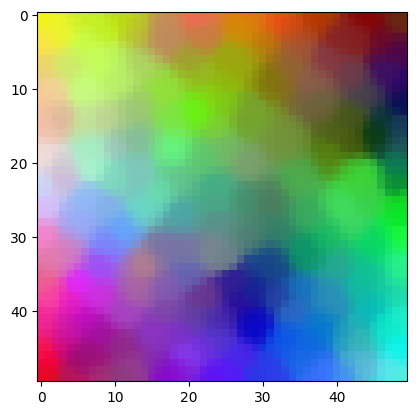

In [6]:
import matplotlib.pyplot as plt

plt.imshow(lattice)
plt.show()

In [7]:
um = u_matrix(lattice)

In [8]:
um.shape

(50, 50)

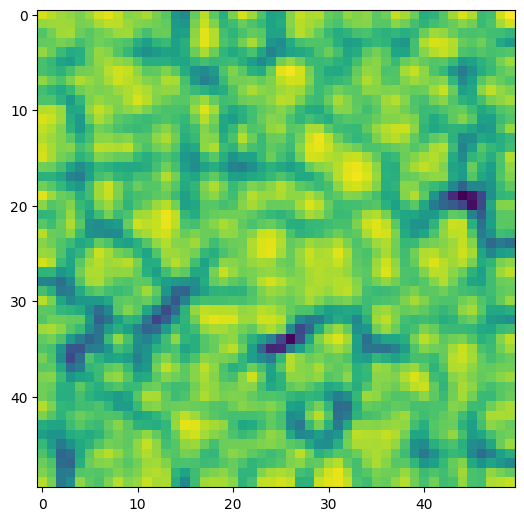

In [9]:
plot_u_matrix(um, fig_size=(6.2,6.2))

In [10]:
colors = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.],[1.,1.,0.],[0.,1.,1.],[1.,0.,1.],[0.,0.,0.],[1.,1.,1.]])
color_labels = ['red', 'green', 'blue', 'yellow', 'cyan', 'purple','black', 'white']

In [11]:
projection = project_on_lattice(colors, lattice, additional_list=color_labels)

for p in projection:
    if projection[p]:
        print (p, projection[p][0])

Projecting on SOM took: 0.346581 seconds.
(0, 0) yellow
(16, 45) black
(19, 0) white
(27, 49) green
(37, 5) purple
(44, 29) blue
(45, 49) cyan
(49, 0) red


In [12]:
closest = lattice_closest_vectors(colors, lattice, additional_list=color_labels)

Finding closest data points took: 0.127542 seconds.


In [13]:
closest[(1,1)]

['yellow']

In [14]:
closest_vec = lattice_closest_vectors(colors, lattice)

Finding closest data points took: 0.003187 seconds.


In [17]:
values = np.array(list(closest_vec.values())).reshape(50,50,-1)
values

array([[[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]]])

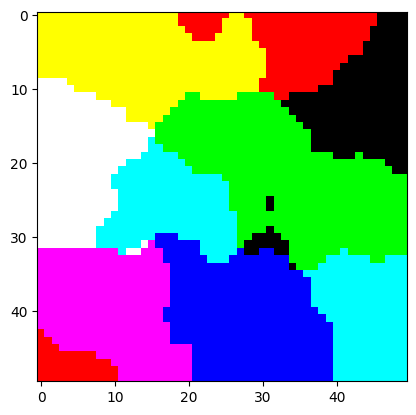

In [18]:
plt.imshow(values)
plt.show()

In [19]:
activations = lattice_activations(colors, lattice)

Computing SOM activations took: 0.374525 seconds.


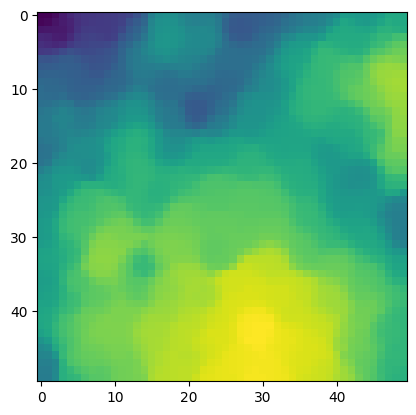

In [20]:
plt.imshow(activations[2])
plt.show()

In [21]:
activations = lattice_activations(colors, lattice, exponent=8)

Computing SOM activations took: 0.001178 seconds.


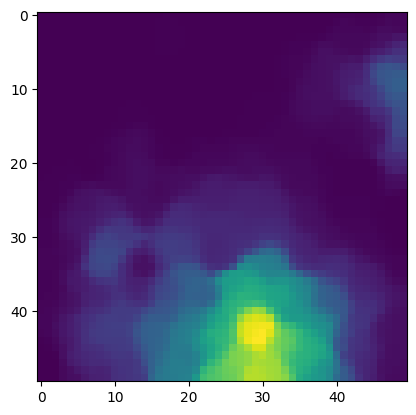

In [22]:
plt.imshow(activations[2])
plt.show()

# KMeans

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import random
import folium as fl
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFilter

In [2]:
## Load data
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/'

In [3]:
filen = 'clim_hist_soil_overall.npy'
ov_data = np.load(path+filen, allow_pickle=True)
ov_data.shape

(121, 67420, 82)

In [4]:
file_fut = 'future_clim_soilgr.npy'
cl_fut = np.load(path+file_fut, allow_pickle=True)

In [5]:
cl_fut.shape

(16, 60137, 81)

In [6]:
cl_fut_flat = cl_fut.reshape(-1, cl_fut.shape[-1])
cl_fut_flat.shape

(962192, 81)

In [7]:
## create labels / future data
year_lables = []
for i in range(16):
    year_lables.append([121+i] * 60137)
year_lables = [item for sublist in year_lables for item in sublist]
len(year_lables)

962192

## Train / Model - one year

In [4]:
dd = pd.DataFrame(ov_data[120])
dd.head()

0   1    2                    3                  4                    5   \
0  120  12  284   -18.84000015258789  7.619999885559082  0.18000000715255737   
1  120  12  285  -18.809999465942383  7.619999885559082  0.18000000715255737   
2  120  12  286  -19.399999618530273  8.029999732971191   0.1899999976158142   
3  120  12  287   -19.06999969482422  8.020000457763672   0.1899999976158142   
4  120  12  288   -19.81999969482422  8.010000228881836  0.18000000715255737   

                   6                  7                    8   \
0  12.640000343322754  5.900000095367432  -37.099998474121094   
1  12.649999618530273  5.900000095367432  -36.900001525878906   
2  13.079999923706055  5.599999904632568   -37.79999923706055   
3  13.069999694824219  5.800000190734863  -37.400001525878906   
4  13.149999618530273  5.300000190734863  -38.099998474121094   

                   9   ...                   12                   13  \
0   42.29999923706055  ...   -4.170000076293945  -31.670000076293945   
1   42.29999923706055  ...   -4.070000171661377  -31.600000381469727   
2                43.0  ...  -3.8299999237060547   -32.70000076293945   
3  42.900001525878906  ...                 -3.5   -32.33000183105469   
4  43.400001525878906  ...   -4.130000114440918  -33.099998474121094   

                   14                   15                   16  \
0                10.0                  6.0                  0.0   
1                10.0                  6.0                  0.0   
2  1.2000000476837158  0.10000000149011612  0.10000000149011612   
3  1.2000000476837158  0.10000000149011612  0.10000000149011612   
4  1.2000000476837158  0.10000000149011612  0.10000000149011612   

                   17                   18                   19  \
0  222.05999755859375                 10.0                  0.0   
1  222.05999755859375                 10.0                  0.0   
2                 0.0  0.30000001192092896  0.30000001192092896   
3                 0.0  0.30000001192092896  0.30000001192092896   
4                 0.0  0.30000001192092896  0.30000001192092896   

                    20                   21  
0                 10.0                  0.0  
1                 10.0                  0.0  
2  0.30000001192092896  0.30000001192092896  
3  0.30000001192092896  0.30000001192092896  
4  0.30000001192092896  0.30000001192092896  

[5 rows x 22 columns]

In [5]:
dd = dd.astype(float)
dd.dropna(inplace=True)
dd.reset_index(inplace=True, drop=True)
sel_data = dd.iloc[:,3:]

In [276]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sel_data)
# Initialize K-Means
num_clusters = 100
kmeans = KMeans(
    init="random",
    n_clusters=num_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [277]:
%%time
kmeans.fit(scaled_data)

CPU times: user 53.7 s, sys: 1.72 s, total: 55.4 s
Wall time: 3.65 s


KMeans(init='random', n_clusters=100, random_state=42)

In [278]:
dd['Cluster_No'] = kmeans.labels_

In [279]:
sel_data.head()

3         4         5          6          7          8    9    10  \
0 -20.191668  7.716667  0.182427  42.299999 -39.100002  12.749866  3.6  0.0   
1 -20.174999  7.708333  0.182230  42.299999 -39.200001  12.782353  3.6  0.0   
2 -20.766668  8.125000  0.188953  43.000000 -40.700001  13.210182  3.3  0.3   
3 -20.483334  8.116666  0.189200  42.900002 -40.400002  13.226416  3.6  0.3   
4 -21.241667  8.108334  0.186828  43.400002 -41.299999  13.338007  3.0  0.3   

     11   12          13         14        15    16   17    18   19        20  \
0  10.0  0.0  222.056488 -33.766666 -6.100000  10.0  6.0  10.0  0.0 -6.100000   
1  10.0  0.0  222.056488 -33.733334 -5.966667  10.0  6.0  10.0  0.0 -5.966667   
2   0.3  0.1    0.000016 -34.799999 -5.733334   1.2  0.1   0.3  0.3 -5.733334   
3   0.3  0.1    0.000016 -34.500000 -5.400000   1.2  0.1   0.3  0.3 -5.400000   
4   0.3  0.1    0.000016 -35.333332 -6.000000   1.2  0.1   0.3  0.3 -6.000000   

          21  
0 -33.766666  
1 -33.733334  
2 -34.799999  
3 -34.500000  
4 -35.333332

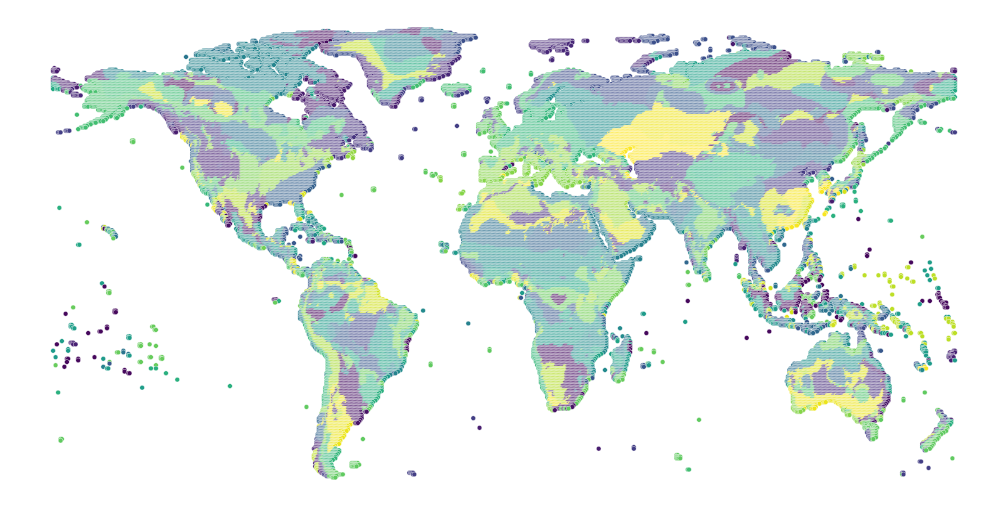

In [280]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=dd,  x=2, y=1, hue='Cluster_No', legend=False, palette="viridis", size=0.01)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

### Project

In [262]:
filename = 'data_inkl_bioclim_grs.csv'
df = pd.read_csv(path+filename)

In [263]:
samples = df.sample(n = 5)

In [264]:
samples

Unnamed: 0   index      gbifID                            datasetKey  \
73873        74684   75712  1259064780  7bd65a7a-f762-11e1-a439-00145eb45e9a   
224307      229871  233158  2515716123  15f819bd-6612-4447-854b-14d12ee1022d   
228170      233763  237080  1259062958  7bd65a7a-f762-11e1-a439-00145eb45e9a   
189844      194377  197188   686824512  dce00a1f-f6b4-4e11-9771-92c62c40ad80   
10359        10503   10665  2513355231  15f819bd-6612-4447-854b-14d12ee1022d   

         kingdom        phylum          class        order            family  \
73873    Plantae  Tracheophyta     Liliopsida  Alismatales           Araceae   
224307   Plantae  Tracheophyta  Magnoliopsida   Santalales      Loranthaceae   
228170   Plantae  Tracheophyta  Magnoliopsida     Lamiales  Scrophulariaceae   
189844  Animalia      Chordata       Amphibia        Anura   Leptodactylidae   
10359    Plantae  Tracheophyta  Magnoliopsida      Apiales        Araliaceae   

                genus  ...    b10         b11        b12        b13  \
73873       Anthurium  ...    8.1  107.164299  21.233335  24.866669   
224307  Lepeostegeres  ...  228.5   26.354450  26.200003  27.533333   
228170       Buddleja  ...    2.7   94.442520   8.900001  13.500000   
189844    Engystomops  ...   14.0   56.585278  15.333333  15.333333   
10359          Aralia  ...   30.5   77.447578  26.100000  26.100000   

                b14         b15         b16         b17        b18        b19  
73873    786.600037  241.900009   96.700005  128.199997  23.233332  22.566668  
224307  3662.599854  335.500000  873.500000  907.100037  26.200003  27.533333  
228170   492.700012  123.599998  133.100006   55.100002  13.300000   9.433333  
189844  1482.400024  189.800003  206.300003  387.500000  15.366668  15.566667  
10359   2320.499756  482.899994  618.400024  119.900002  25.666666  26.100000  

[5 rows x 38 columns]

In [265]:
sel_pred_sc = scaler.transform(samples.iloc[:, 19:].values)
kmeans.predict(sel_pred_sc)

array([5, 8, 0, 5, 3], dtype=int32)

## Train / Model - history

In [8]:
ov_data.shape

(121, 67420, 82)

In [9]:
ov_data_fl = ov_data.reshape(-1, ov_data.shape[-1])

In [10]:
ov_data_fl.shape

(8157820, 82)

In [39]:
dd = pd.DataFrame(ov_data_fl) # past data
ff = pd.DataFrame(cl_fut_flat) # future data
dd.columns = np.arange(0,82)

In [40]:
ff.insert(0,'x',year_lables)
ff.columns = dd.columns.values.tolist()

In [86]:
df_all = pd.concat([dd, ff], axis=0, ignore_index=True)

In [87]:
df_all.shape

(9120012, 82)

In [88]:
df_all.tail()

0      1      2    3    4     5      6     7    8     9   ...  \
9120007  136  289.0  220.0  7.0  5.8  48.3  233.3  13.5  1.5  12.0  ...   
9120008  136  289.0  221.0  6.8  6.0  47.2  256.2  13.8  1.0  12.8  ...   
9120009  136  289.0  222.0  7.0  6.1  46.7  262.2  14.0  0.9  13.0  ...   
9120010  136  289.0  224.0  7.3  6.3  44.4  298.5  14.9  0.7  14.2  ...   
9120011  136  289.0  225.0  7.3  6.4  44.3  301.8  15.1  0.7  14.4  ...   

             72      73      74      75     76     77     78     79     80  \
9120007     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
9120008     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
9120009  1593.0  1514.0  1436.0  1488.0  709.0  607.0  464.0  429.0  374.0   
9120010  1507.0  1366.0  1288.0  1299.0  719.0  581.0  470.0  415.0  383.0   
9120011  1417.0  1383.0  1265.0  1288.0  725.0  556.0  411.0  354.0  313.0   

            81  
9120007    0.0  
9120008    0.0  
9120009  381.0  
9120010  391.0  
9120011  314.0  

[5 rows x 82 columns]

In [89]:
df_all = df_all.astype(float)
df_all.dropna(inplace=True)
df_all.reset_index(inplace=True, drop=True)
sel_data = df_all.iloc[:,3:]

In [90]:
sel_data.shape

(9119314, 79)

In [91]:
def get_mean_soilgrid_columns(df):
    ## OPTIONAL ## get mean of soilgrid columns - 10 x 6 
    for i in range(10):
        df[f'average_{i*6}_{i*6+5}'] = df.iloc[: , (20+(i*6)):(20+(i*6)+6)].mean(axis=1)
    df.drop(columns=np.arange(22,82), inplace=True)
    return df

In [92]:
sel_data = get_mean_soilgrid_columns(sel_data)
sel_data

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_78936/371434831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'average_{i*6}_{i*6+5}'] = df.iloc[: , (20+(i*6)):(20+(i*6)+6)].mean(axis=1)
/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_78936/371434831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'average_{i*6}_{i*6+5}'] = df.iloc[: , (20+(i*6)):(20+(i*6)+6)].mean(axis=1)


3         4      5       6     7          8          9    10  \
0       -20.191668  7.716667   0.18   12.75   3.6 -39.099998  42.299999 -6.10   
1       -20.174999  7.708333   0.18   12.78   3.6 -39.200001  42.299999 -5.97   
2       -20.766668  8.125000   0.19   13.21   3.3 -40.700001  43.000000 -5.73   
3       -20.483334  8.116666   0.19   13.23   3.6 -40.400002  42.900002 -5.40   
4       -21.241667  8.108334   0.19   13.34   3.0 -41.299999  43.400002 -6.00   
...            ...       ...    ...     ...   ...        ...        ...   ...   
9119309   7.000000  5.800000  48.30  233.30  13.5   1.500000  12.000000  8.70   
9119310   6.800000  6.000000  47.20  256.20  13.8   1.000000  12.800000  7.90   
9119311   7.000000  6.100000  46.70  262.20  14.0   0.900000  13.000000  7.90   
9119312   7.300000  6.300000  44.40  298.50  14.9   0.700000  14.200000  4.20   
9119313   7.300000  6.400000  44.30  301.80  15.1   0.700000  14.400000  6.40   

                11     12  ...  average_0_5  average_6_11  average_12_17  \
0       -33.770000  -6.10  ...     0.000000      0.000000       0.000000   
1       -33.730000  -5.97  ...     0.000000      0.000000       0.000000   
2       -34.799999  -5.73  ...     0.000000      0.000000       0.000000   
3       -34.500000  -5.40  ...     0.000000      0.000000       0.000000   
4       -35.330002  -6.00  ...     0.000000      0.000000       0.000000   
...            ...    ...  ...          ...           ...            ...   
9119309   5.400000   9.80  ...     0.000000      0.000000       0.000000   
9119310   5.000000   9.80  ...     0.000000      0.000000       0.000000   
9119311   5.200000  10.10  ...   141.666667    227.333333     232.666667   
9119312   5.400000  10.80  ...    57.333333    206.833333     200.666667   
9119313   5.500000  10.90  ...    66.666667    262.166667     231.833333   

         average_18_23  average_24_29  average_30_35  average_36_41  \
0             0.000000       0.000000       0.000000       0.000000   
1             0.000000       0.000000       0.000000       0.000000   
2             0.000000       0.000000       0.000000       0.000000   
3             0.000000       0.000000       0.000000       0.000000   
4             0.000000       0.000000       0.000000       0.000000   
...                ...            ...            ...            ...   
9119309       0.000000       0.000000       0.000000       0.000000   
9119310       0.000000       0.000000       0.000000       0.000000   
9119311     330.166667     568.833333     140.833333     517.833333   
9119312     364.833333     600.666667     133.333333     491.666667   
9119313     366.000000     594.666667     133.666667     465.833333   

         average_42_47  average_48_53  average_54_59  
0             0.000000       0.000000       0.000000  
1             0.000000       0.000000       0.000000  
2             0.000000       0.000000       0.000000  
3             0.000000       0.000000       0.000000  
4             0.000000       0.000000       0.000000  
...                ...            ...            ...  
9119309       0.000000       0.000000       0.000000  
9119310       0.000000       0.000000       0.000000  
9119311     572.333333    1416.666667     399.444444  
9119312     599.333333    1367.333333     382.888889  
9119313     584.500000    1314.166667     335.777778  

[9119314 rows x 29 columns]

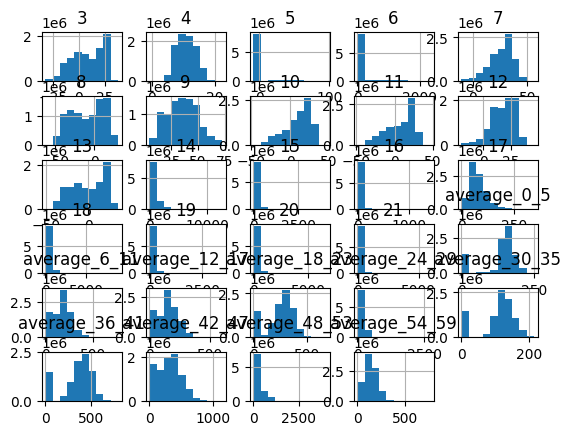

In [93]:
sel_data.hist();

## scaling / training

In [94]:
# Scaling
scaler = RobustScaler()
scaler.fit(sel_data)
scaled_data = scaler.transform(sel_data)
# Initialize K-Means .
num_clusters = 75
kmeans = MiniBatchKMeans(
    init="k-means++",
    n_clusters=num_clusters,
    n_init=10,
    random_state=42, 
    verbose=1
)

/Users/davidschildberger/.pyenv/versions/3.10.6/envs/planetary_garden/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/davidschildberger/.pyenv/versions/3.10.6/envs/planetary_garden/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [95]:
%%time
kmeans.fit(scaled_data)

Init 1/10 with method k-means++
Inertia for init 1/10: 44387.2192403361
Init 2/10 with method k-means++
Inertia for init 2/10: 43816.09299148142
Init 3/10 with method k-means++
Inertia for init 3/10: 42837.812457050524
Init 4/10 with method k-means++
Inertia for init 4/10: 43891.80444774759
Init 5/10 with method k-means++
Inertia for init 5/10: 44283.33360467314
Init 6/10 with method k-means++
Inertia for init 6/10: 42336.50034685912
Init 7/10 with method k-means++
Inertia for init 7/10: 41291.799040665544
Init 8/10 with method k-means++
Inertia for init 8/10: 45318.66382042829
Init 9/10 with method k-means++
Inertia for init 9/10: 40037.01415982683
Init 10/10 with method k-means++
Inertia for init 10/10: 41230.688263517164
[MiniBatchKMeans] Reassigning 25 cluster centers.
Minibatch step 1/890558: mean batch inertia: 13.432321361840227
Minibatch step 2/890558: mean batch inertia: 16.42343749243225, ewa inertia: 16.42343749243225
Minibatch step 3/890558: mean batch inertia: 15.063923250

Minibatch step 178/890558: mean batch inertia: 11.35864051366504, ewa inertia: 16.275908013936213
Minibatch step 179/890558: mean batch inertia: 12.59348335758887, ewa inertia: 16.27508102137195
Minibatch step 180/890558: mean batch inertia: 13.058849916195562, ewa inertia: 16.27435872574959
Minibatch step 181/890558: mean batch inertia: 13.726141938870185, ewa inertia: 16.273786451628176
Minibatch step 182/890558: mean batch inertia: 12.052013146382082, ewa inertia: 16.272838333076603
Minibatch step 183/890558: mean batch inertia: 14.114862576493525, ewa inertia: 16.272353698611244
Minibatch step 184/890558: mean batch inertia: 12.094079643968232, ewa inertia: 16.271415349046183
Minibatch step 185/890558: mean batch inertia: 12.106388419390866, ewa inertia: 16.270479974497555
Minibatch step 186/890558: mean batch inertia: 9.790792940477042, ewa inertia: 16.269024777583567
Minibatch step 187/890558: mean batch inertia: 12.792342888880317, ewa inertia: 16.268243990374437
Minibatch step 

Minibatch step 379/890558: mean batch inertia: 12.849740221353532, ewa inertia: 16.104026201312394
Minibatch step 380/890558: mean batch inertia: 13.5490865281905, ewa inertia: 16.103452417376808
Minibatch step 381/890558: mean batch inertia: 13.441411822246721, ewa inertia: 16.10285458090128
Minibatch step 382/890558: mean batch inertia: 11.079987182429786, ewa inertia: 16.101726554022935
Minibatch step 383/890558: mean batch inertia: 11.132747996352032, ewa inertia: 16.100610629407313
Minibatch step 384/890558: mean batch inertia: 10.399079681692644, ewa inertia: 16.099330189442153
Minibatch step 385/890558: mean batch inertia: 12.856235102446174, ewa inertia: 16.09860186075319
Minibatch step 386/890558: mean batch inertia: 12.334895927537644, ewa inertia: 16.097756614180263
Minibatch step 387/890558: mean batch inertia: 11.684050078712445, ewa inertia: 16.096765391595603
Minibatch step 388/890558: mean batch inertia: 9.330723435490327, ewa inertia: 16.095245885588177
Minibatch step 

Minibatch step 589/890558: mean batch inertia: 11.675798477098317, ewa inertia: 15.922407357468284
Minibatch step 590/890558: mean batch inertia: 10.383430110835928, ewa inertia: 15.921163423532336
Minibatch step 591/890558: mean batch inertia: 13.406969505497383, ewa inertia: 15.920598790207999
Minibatch step 592/890558: mean batch inertia: 11.181311739915405, ewa inertia: 15.919534449314083
Minibatch step 593/890558: mean batch inertia: 11.927355915469978, ewa inertia: 15.918637892759419
Minibatch step 594/890558: mean batch inertia: 11.067364989361351, ewa inertia: 15.91754840227618
Minibatch step 595/890558: mean batch inertia: 12.631998241782366, ewa inertia: 15.916810539100197
Minibatch step 596/890558: mean batch inertia: 16.864325569064643, ewa inertia: 15.91702333038785
Minibatch step 597/890558: mean batch inertia: 10.383370099555757, ewa inertia: 15.915780592110169
Minibatch step 598/890558: mean batch inertia: 12.870120322307304, ewa inertia: 15.915096602991188
Minibatch st

Minibatch step 787/890558: mean batch inertia: 11.621803109564762, ewa inertia: 15.755232187814293
Minibatch step 788/890558: mean batch inertia: 12.324044317522194, ewa inertia: 15.75446161757318
Minibatch step 789/890558: mean batch inertia: 12.262288520502175, ewa inertia: 15.753677351375247
Minibatch step 790/890558: mean batch inertia: 13.288688362009283, ewa inertia: 15.753123768408738
Minibatch step 791/890558: mean batch inertia: 10.532543112104928, ewa inertia: 15.751951339428699
Minibatch step 792/890558: mean batch inertia: 12.70401578619557, ewa inertia: 15.751266839330498
Minibatch step 793/890558: mean batch inertia: 10.256206274314373, ewa inertia: 15.750032768126998
Minibatch step 794/890558: mean batch inertia: 12.010872148485332, ewa inertia: 15.749193033898164
Minibatch step 795/890558: mean batch inertia: 14.301382029382257, ewa inertia: 15.748867887005305
Minibatch step 796/890558: mean batch inertia: 10.354220186722568, ewa inertia: 15.747656366349403
Minibatch st

Minibatch step 1014/890558: mean batch inertia: 12.051287936983119, ewa inertia: 15.579447845028078
Minibatch step 1015/890558: mean batch inertia: 13.933419805454124, ewa inertia: 15.579078182896104
Minibatch step 1016/890558: mean batch inertia: 11.826741252925924, ewa inertia: 15.578235489554272
Minibatch step 1017/890558: mean batch inertia: 10.138171824868714, ewa inertia: 15.577013769459587
Minibatch step 1018/890558: mean batch inertia: 12.764243965971941, ewa inertia: 15.576382082478982
Minibatch step 1019/890558: mean batch inertia: 15.054065782400503, ewa inertia: 15.576264781587133
Minibatch step 1020/890558: mean batch inertia: 10.906743793160464, ewa inertia: 15.575216108634802
Minibatch step 1021/890558: mean batch inertia: 12.175675092812963, ewa inertia: 15.574452645589563
Minibatch step 1022/890558: mean batch inertia: 12.113248004967032, ewa inertia: 15.573675334234052
Minibatch step 1023/890558: mean batch inertia: 11.172916322387737, ewa inertia: 15.572687019381867


Minibatch step 1224/890558: mean batch inertia: 10.817459215562243, ewa inertia: 15.424722536733253
Minibatch step 1225/890558: mean batch inertia: 12.477021028103774, ewa inertia: 15.424060547023535
Minibatch step 1226/890558: mean batch inertia: 11.809878280447805, ewa inertia: 15.423248880217207
Minibatch step 1227/890558: mean batch inertia: 10.972743859417807, ewa inertia: 15.422249393492317
Minibatch step 1228/890558: mean batch inertia: 14.434488047417375, ewa inertia: 15.422027563756558
Minibatch step 1229/890558: mean batch inertia: 13.154319686216379, ewa inertia: 15.421518285841143
Minibatch step 1230/890558: mean batch inertia: 13.456223070938687, ewa inertia: 15.421076923238786
Minibatch step 1231/890558: mean batch inertia: 11.685813419084031, ewa inertia: 15.420238064217413
Minibatch step 1232/890558: mean batch inertia: 11.24118675665196, ewa inertia: 15.419299540098233
Minibatch step 1233/890558: mean batch inertia: 13.972660335599123, ewa inertia: 15.418974656366197
M

Minibatch step 1457/890558: mean batch inertia: 13.615929545199418, ewa inertia: 15.258349324018885
Minibatch step 1458/890558: mean batch inertia: 13.539607589208728, ewa inertia: 15.25796333197092
Minibatch step 1459/890558: mean batch inertia: 13.706080307403472, ewa inertia: 15.257614812763686
Minibatch step 1460/890558: mean batch inertia: 12.679578237063605, ewa inertia: 15.257035841765642
Minibatch step 1461/890558: mean batch inertia: 12.494223926911975, ewa inertia: 15.256415374241316
Minibatch step 1462/890558: mean batch inertia: 12.55907560636151, ewa inertia: 15.255809610338586
Minibatch step 1463/890558: mean batch inertia: 11.298874984992562, ewa inertia: 15.254920968799972
Minibatch step 1464/890558: mean batch inertia: 11.856960847294122, ewa inertia: 15.254157860789245
Minibatch step 1465/890558: mean batch inertia: 12.805727101767397, ewa inertia: 15.253607996441488
Minibatch step 1466/890558: mean batch inertia: 12.492392844652828, ewa inertia: 15.252987887515449
Mi

Minibatch step 1629/890558: mean batch inertia: 13.300221121132832, ewa inertia: 15.14470605424779
Minibatch step 1630/890558: mean batch inertia: 12.795920201490407, ewa inertia: 15.144178567980846
Minibatch step 1631/890558: mean batch inertia: 11.259842086952805, ewa inertia: 15.143306230407998
Minibatch step 1632/890558: mean batch inertia: 10.74748251660954, ewa inertia: 15.142319023916517
Minibatch step 1633/890558: mean batch inertia: 11.961818204411333, ewa inertia: 15.141604752539957
Minibatch step 1634/890558: mean batch inertia: 13.76526131446672, ewa inertia: 15.141295655709639
Minibatch step 1635/890558: mean batch inertia: 13.269082677675046, ewa inertia: 15.140875197355145
Minibatch step 1636/890558: mean batch inertia: 12.675654550311734, ewa inertia: 15.140321562363358
Minibatch step 1637/890558: mean batch inertia: 12.342834013014185, ewa inertia: 15.139693307444972
Minibatch step 1638/890558: mean batch inertia: 13.112341021887376, ewa inertia: 15.139238008172951
Min

Minibatch step 1793/890558: mean batch inertia: 12.184012855077128, ewa inertia: 15.040560490901047
Minibatch step 1794/890558: mean batch inertia: 11.240781433315352, ewa inertia: 15.039707143088197
Minibatch step 1795/890558: mean batch inertia: 10.95464838090724, ewa inertia: 15.038789727652395
Minibatch step 1796/890558: mean batch inertia: 11.967990620565612, ewa inertia: 15.038100092896789
Minibatch step 1797/890558: mean batch inertia: 12.478344993085546, ewa inertia: 15.037525227521002
Minibatch step 1798/890558: mean batch inertia: 14.141191464246782, ewa inertia: 15.037323930433756
Minibatch step 1799/890558: mean batch inertia: 13.750831958880994, ewa inertia: 15.037035012290481
Minibatch step 1800/890558: mean batch inertia: 10.6853797008759, ewa inertia: 15.036057725062463
Minibatch step 1801/890558: mean batch inertia: 10.74706119197979, ewa inertia: 15.035094509634579
Minibatch step 1802/890558: mean batch inertia: 12.449446757553822, ewa inertia: 15.0345138293317
Miniba

Minibatch step 1996/890558: mean batch inertia: 11.089194046005538, ewa inertia: 14.911316135290267
Minibatch step 1997/890558: mean batch inertia: 13.518152957625864, ewa inertia: 14.911003261111905
Minibatch step 1998/890558: mean batch inertia: 11.55110795390912, ewa inertia: 14.91024870163138
Minibatch step 1999/890558: mean batch inertia: 10.746499717775437, ewa inertia: 14.90931361408161
Minibatch step 2000/890558: mean batch inertia: 12.814524305991625, ewa inertia: 14.908843169919635
Minibatch step 2001/890558: mean batch inertia: 13.028634881703008, ewa inertia: 14.9084209159922
Minibatch step 2002/890558: mean batch inertia: 12.4133028081157, ewa inertia: 14.907860566680336
Minibatch step 2003/890558: mean batch inertia: 13.463246252710103, ewa inertia: 14.907536137694715
Minibatch step 2004/890558: mean batch inertia: 12.444254785493323, ewa inertia: 14.906982938226411
Minibatch step 2005/890558: mean batch inertia: 12.9072582668358, ewa inertia: 14.906533843516227
Minibatch

Minibatch step 2202/890558: mean batch inertia: 11.664679672924418, ewa inertia: 14.787338971001597
Minibatch step 2203/890558: mean batch inertia: 10.707396412224638, ewa inertia: 14.786422704553912
Minibatch step 2204/890558: mean batch inertia: 10.39979981535028, ewa inertia: 14.785437564367715
Minibatch step 2205/890558: mean batch inertia: 11.421841339539299, ewa inertia: 14.784682173741507
Minibatch step 2206/890558: mean batch inertia: 11.638536812991255, ewa inertia: 14.78397561785449
Minibatch step 2207/890558: mean batch inertia: 12.050495399033416, ewa inertia: 14.783361737591758
Minibatch step 2208/890558: mean batch inertia: 12.190194322506608, ewa inertia: 14.782779368535959
Minibatch step 2209/890558: mean batch inertia: 11.299152707317603, ewa inertia: 14.781997021681818
Minibatch step 2210/890558: mean batch inertia: 10.673447113266004, ewa inertia: 14.781074330645
Minibatch step 2211/890558: mean batch inertia: 11.287199446690774, ewa inertia: 14.780289682262712
Minib

Minibatch step 2390/890558: mean batch inertia: 12.663214894373487, ewa inertia: 14.672044791222223
Minibatch step 2391/890558: mean batch inertia: 11.442803778746713, ewa inertia: 14.671319573857373
Minibatch step 2392/890558: mean batch inertia: 11.41052430962657, ewa inertia: 14.670587270093204
Minibatch step 2393/890558: mean batch inertia: 12.560228583752473, ewa inertia: 14.670113329387174
Minibatch step 2394/890558: mean batch inertia: 12.117887660513425, ewa inertia: 14.669540154957971
Minibatch step 2395/890558: mean batch inertia: 12.332209396624378, ewa inertia: 14.669015241256332
Minibatch step 2396/890558: mean batch inertia: 11.796863842683155, ewa inertia: 14.668370218459744
Minibatch step 2397/890558: mean batch inertia: 13.61362335240477, ewa inertia: 14.668133345231693
Minibatch step 2398/890558: mean batch inertia: 10.84860745846325, ewa inertia: 14.66727556271008
Minibatch step 2399/890558: mean batch inertia: 12.876262738303977, ewa inertia: 14.666873340145735
Mini

Minibatch step 2578/890558: mean batch inertia: 10.43682918903059, ewa inertia: 14.559755483039941
Minibatch step 2579/890558: mean batch inertia: 12.38664556592185, ewa inertia: 14.559267449770967
Minibatch step 2580/890558: mean batch inertia: 12.188925861729759, ewa inertia: 14.558735122554252
Minibatch step 2581/890558: mean batch inertia: 13.230912913089535, ewa inertia: 14.558436922537586
Minibatch step 2582/890558: mean batch inertia: 9.851488767921511, ewa inertia: 14.557379844256964
Minibatch step 2583/890558: mean batch inertia: 12.551610577446503, ewa inertia: 14.556929392061988
Minibatch step 2584/890558: mean batch inertia: 12.426755858172385, ewa inertia: 14.556451001371745
Minibatch step 2585/890558: mean batch inertia: 13.931717511305834, ewa inertia: 14.556310699804396
Minibatch step 2586/890558: mean batch inertia: 12.617027462414859, ewa inertia: 14.555875178926987
Minibatch step 2587/890558: mean batch inertia: 12.541012159299346, ewa inertia: 14.555422684472724
Min

Minibatch step 2803/890558: mean batch inertia: 10.507430756826498, ewa inertia: 14.430307291621691
Minibatch step 2804/890558: mean batch inertia: 13.2164991213575, ewa inertia: 14.430034696680876
Minibatch step 2805/890558: mean batch inertia: 13.023042097565648, ewa inertia: 14.429718716714948
Minibatch step 2806/890558: mean batch inertia: 10.82516034079087, ewa inertia: 14.428909211225347
Minibatch step 2807/890558: mean batch inertia: 12.364832449650187, ewa inertia: 14.428445664433982
Minibatch step 2808/890558: mean batch inertia: 12.351196012995183, ewa inertia: 14.42797915929778
Minibatch step 2809/890558: mean batch inertia: 11.540831214588188, ewa inertia: 14.427330768602783
Minibatch step 2810/890558: mean batch inertia: 10.090186949597712, ewa inertia: 14.426356740340646
Minibatch step 2811/890558: mean batch inertia: 10.853256647108147, ewa inertia: 14.425554299697797
Minibatch step 2812/890558: mean batch inertia: 12.411013353369592, ewa inertia: 14.425101877574198
Mini

Minibatch step 3010/890558: mean batch inertia: 10.49632008513916, ewa inertia: 14.3227928698962
Minibatch step 3011/890558: mean batch inertia: 13.98323980642056, ewa inertia: 14.322716613656121
Minibatch step 3012/890558: mean batch inertia: 12.715663956683876, ewa inertia: 14.322355704548203
Minibatch step 3013/890558: mean batch inertia: 13.165981095949386, ewa inertia: 14.322096007937393
Minibatch step 3014/890558: mean batch inertia: 10.531031775910401, ewa inertia: 14.321244617285005
Minibatch step 3015/890558: mean batch inertia: 12.685516687536182, ewa inertia: 14.320877268333891
Minibatch step 3016/890558: mean batch inertia: 11.735556568804515, ewa inertia: 14.320296661479908
Minibatch step 3017/890558: mean batch inertia: 10.605548939029953, ewa inertia: 14.319462409857326
Minibatch step 3018/890558: mean batch inertia: 11.38670996472342, ewa inertia: 14.318803777382449
Minibatch step 3019/890558: mean batch inertia: 12.324477907464802, ewa inertia: 14.318355895125768
Minib

Minibatch step 3200/890558: mean batch inertia: 12.531846798561778, ewa inertia: 14.232184582064475
Minibatch step 3201/890558: mean batch inertia: 12.028013465037144, ewa inertia: 14.231689573124916
Minibatch step 3202/890558: mean batch inertia: 10.460097432048668, ewa inertia: 14.230842555481056
Minibatch step 3203/890558: mean batch inertia: 12.128928112017384, ewa inertia: 14.230370511168495
Minibatch step 3204/890558: mean batch inertia: 12.760975213265812, ewa inertia: 14.230040516912336
Minibatch step 3205/890558: mean batch inertia: 12.790462848513314, ewa inertia: 14.229717219047872
Minibatch step 3206/890558: mean batch inertia: 12.58181112440224, ewa inertia: 14.229347135145536
Minibatch step 3207/890558: mean batch inertia: 10.64041955029873, ewa inertia: 14.228541139991979
Minibatch step 3208/890558: mean batch inertia: 12.033249158550326, ewa inertia: 14.22804812511334
Minibatch step 3209/890558: mean batch inertia: 11.19116801357971, ewa inertia: 14.227366107827127
Mini

Minibatch step 3407/890558: mean batch inertia: 11.68569155674177, ewa inertia: 14.136029684309712
Minibatch step 3408/890558: mean batch inertia: 11.428930665627803, ewa inertia: 14.135421728691306
Minibatch step 3409/890558: mean batch inertia: 10.93930954375162, ewa inertia: 14.13470395134128
Minibatch step 3410/890558: mean batch inertia: 10.848569459471285, ewa inertia: 14.133965956937168
Minibatch step 3411/890558: mean batch inertia: 10.912750576080075, ewa inertia: 14.133242541954793
Minibatch step 3412/890558: mean batch inertia: 10.881270106328214, ewa inertia: 14.132512219606221
Minibatch step 3413/890558: mean batch inertia: 11.97650212760365, ewa inertia: 14.132028026586415
Minibatch step 3414/890558: mean batch inertia: 11.61982294343369, ewa inertia: 14.131463839911177
Minibatch step 3415/890558: mean batch inertia: 10.981382925572305, ewa inertia: 14.130756400184337
Minibatch step 3416/890558: mean batch inertia: 11.610428008566704, ewa inertia: 14.130190389190526
Minib

Minibatch step 3626/890558: mean batch inertia: 13.450464454951184, ewa inertia: 14.036586008326843
Minibatch step 3627/890558: mean batch inertia: 12.078672957004912, ewa inertia: 14.036146303598022
Minibatch step 3628/890558: mean batch inertia: 9.833327847860449, ewa inertia: 14.035202441893787
Minibatch step 3629/890558: mean batch inertia: 11.931273492966849, ewa inertia: 14.03472994516707
Minibatch step 3630/890558: mean batch inertia: 11.630746500355404, ewa inertia: 14.034190062720311
Minibatch step 3631/890558: mean batch inertia: 11.102965566395486, ewa inertia: 14.033531773389537
Minibatch step 3632/890558: mean batch inertia: 13.238303647067347, ewa inertia: 14.033353182431478
Minibatch step 3633/890558: mean batch inertia: 13.350155895516352, ewa inertia: 14.033199751165686
Minibatch step 3634/890558: mean batch inertia: 10.863568559476729, ewa inertia: 14.032487920871352
Minibatch step 3635/890558: mean batch inertia: 11.87855003991815, ewa inertia: 14.032004193225122
Min

Minibatch step 3859/890558: mean batch inertia: 11.88954789407244, ewa inertia: 13.93392199505163
Minibatch step 3860/890558: mean batch inertia: 10.6327197178496, ewa inertia: 13.933180616750331
Minibatch step 3861/890558: mean batch inertia: 15.710046191106443, ewa inertia: 13.933579662149715
Minibatch step 3862/890558: mean batch inertia: 11.785696976786326, ewa inertia: 13.933097294368844
Minibatch step 3863/890558: mean batch inertia: 12.387487704677863, ewa inertia: 13.932750184038772
Minibatch step 3864/890558: mean batch inertia: 13.335467009392385, ewa inertia: 13.932616047215813
Minibatch step 3865/890558: mean batch inertia: 11.683785382369152, ewa inertia: 13.932111008712198
Minibatch step 3866/890558: mean batch inertia: 11.193290335577558, ewa inertia: 13.931495929099466
Minibatch step 3867/890558: mean batch inertia: 10.633950213553163, ewa inertia: 13.930755371982464
Minibatch step 3868/890558: mean batch inertia: 12.44016491288657, ewa inertia: 13.93042061775364
Miniba

Minibatch step 4041/890558: mean batch inertia: 12.549368313898382, ewa inertia: 13.861231075958075
Minibatch step 4042/890558: mean batch inertia: 12.279155557669707, ewa inertia: 13.86087577617279
Minibatch step 4043/890558: mean batch inertia: 13.72398306236524, ewa inertia: 13.860845033043741
Minibatch step 4044/890558: mean batch inertia: 11.673700236701169, ewa inertia: 13.86035384784585
Minibatch step 4045/890558: mean batch inertia: 11.928653052261097, ewa inertia: 13.859920029820115
Minibatch step 4046/890558: mean batch inertia: 11.708892538446632, ewa inertia: 13.859436955784146
Minibatch step 4047/890558: mean batch inertia: 10.338018142891071, ewa inertia: 13.858646121633905
Minibatch step 4048/890558: mean batch inertia: 10.876963180408001, ewa inertia: 13.857976500432791
Minibatch step 4049/890558: mean batch inertia: 10.876250403061384, ewa inertia: 13.857306869539746
Minibatch step 4050/890558: mean batch inertia: 10.368089222564311, ewa inertia: 13.856523267071688
Min

Minibatch step 4208/890558: mean batch inertia: 12.829829486898277, ewa inertia: 13.790515671171763
Minibatch step 4209/890558: mean batch inertia: 14.154595966573083, ewa inertia: 13.790597435695194
Minibatch step 4210/890558: mean batch inertia: 12.78360980141932, ewa inertia: 13.790371288152864
Minibatch step 4211/890558: mean batch inertia: 11.673249610345106, ewa inertia: 13.789895828625898
Minibatch step 4212/890558: mean batch inertia: 11.915980573078656, ewa inertia: 13.789474987976863
Minibatch step 4213/890558: mean batch inertia: 14.328368760969585, ewa inertia: 13.789596011808927
Minibatch step 4214/890558: mean batch inertia: 12.93583083221592, ewa inertia: 13.789404274700624
Minibatch step 4215/890558: mean batch inertia: 11.64041910026321, ewa inertia: 13.78892165932466
Minibatch step 4216/890558: mean batch inertia: 12.766319080094254, ewa inertia: 13.788692005004982
Minibatch step 4217/890558: mean batch inertia: 12.038190331257564, ewa inertia: 13.788298880364827
Mini

Minibatch step 4402/890558: mean batch inertia: 10.727790573283253, ewa inertia: 13.71298161225477
Minibatch step 4403/890558: mean batch inertia: 16.663826107560382, ewa inertia: 13.713644307811004
Minibatch step 4404/890558: mean batch inertia: 11.248946374009908, ewa inertia: 13.713090790209252
Minibatch step 4405/890558: mean batch inertia: 11.814936476229386, ewa inertia: 13.712664505994372
Minibatch step 4406/890558: mean batch inertia: 12.360950542478639, ewa inertia: 13.712360940408878
Minibatch step 4407/890558: mean batch inertia: 10.84954979293207, ewa inertia: 13.711718015229737
Minibatch step 4408/890558: mean batch inertia: 14.336137323989853, ewa inertia: 13.711858246238792
Minibatch step 4409/890558: mean batch inertia: 11.997895851977045, ewa inertia: 13.711473327526868
Minibatch step 4410/890558: mean batch inertia: 10.725520270137391, ewa inertia: 13.710802747350447
Minibatch step 4411/890558: mean batch inertia: 10.331698275284648, ewa inertia: 13.71004387390888
Min

Minibatch step 4619/890558: mean batch inertia: 12.641803497632948, ewa inertia: 13.636381304940574
Minibatch step 4620/890558: mean batch inertia: 10.037478333755466, ewa inertia: 13.635573069531995
Minibatch step 4621/890558: mean batch inertia: 13.317242477650787, ewa inertia: 13.635501579397904
Minibatch step 4622/890558: mean batch inertia: 13.405550959694988, ewa inertia: 13.6354499374852
Minibatch step 4623/890558: mean batch inertia: 12.228249607712865, ewa inertia: 13.635133910867479
Minibatch step 4624/890558: mean batch inertia: 11.049035791656049, ewa inertia: 13.634553129421928
Minibatch step 4625/890558: mean batch inertia: 11.100378297236263, ewa inertia: 13.633984008818427
Minibatch step 4626/890558: mean batch inertia: 11.399752641936715, ewa inertia: 13.633482248999913
Minibatch step 4627/890558: mean batch inertia: 10.90018761081514, ewa inertia: 13.63286841041456
Minibatch step 4628/890558: mean batch inertia: 12.213303367045718, ewa inertia: 13.632549606950832
Mini

Minibatch step 4820/890558: mean batch inertia: 11.377210722615084, ewa inertia: 13.56497095107988
Minibatch step 4821/890558: mean batch inertia: 12.007445845506714, ewa inertia: 13.564621164783846
Minibatch step 4822/890558: mean batch inertia: 14.343660623837934, ewa inertia: 13.564796120118993
Minibatch step 4823/890558: mean batch inertia: 10.743238903386022, ewa inertia: 13.56416245967631
Minibatch step 4824/890558: mean batch inertia: 12.498565908431445, ewa inertia: 13.563923149844712
Minibatch step 4825/890558: mean batch inertia: 11.742391386076754, ewa inertia: 13.563514073389715
Minibatch step 4826/890558: mean batch inertia: 11.134300907866642, ewa inertia: 13.562968524895888
Minibatch step 4827/890558: mean batch inertia: 12.670801610043577, ewa inertia: 13.562768163592258
Minibatch step 4828/890558: mean batch inertia: 11.19598816773835, ewa inertia: 13.562236636231761
Minibatch step 4829/890558: mean batch inertia: 11.612491591335981, ewa inertia: 13.561798765859706
Min

Minibatch step 5007/890558: mean batch inertia: 13.611760692565008, ewa inertia: 13.50275605849534
Minibatch step 5008/890558: mean batch inertia: 10.693843245962704, ewa inertia: 13.502125237711098
Minibatch step 5009/890558: mean batch inertia: 12.373481905415709, ewa inertia: 13.501871768942388
Minibatch step 5010/890558: mean batch inertia: 12.153960279109347, ewa inertia: 13.501569057309862
Minibatch step 5011/890558: mean batch inertia: 10.94398557237152, ewa inertia: 13.500994679631587
Minibatch step 5012/890558: mean batch inertia: 11.103817152385028, ewa inertia: 13.50045632564603
Minibatch step 5013/890558: mean batch inertia: 10.429311147403789, ewa inertia: 13.499766613170364
Minibatch step 5014/890558: mean batch inertia: 10.279396862377414, ewa inertia: 13.499043388098126
Minibatch step 5015/890558: mean batch inertia: 12.235311704413991, ewa inertia: 13.49875958142096
Minibatch step 5016/890558: mean batch inertia: 11.984810120623365, ewa inertia: 13.498419581267912
Mini

Minibatch step 5234/890558: mean batch inertia: 11.790319255961432, ewa inertia: 13.429981952126253
Minibatch step 5235/890558: mean batch inertia: 12.325998501670398, ewa inertia: 13.429734021431182
Minibatch step 5236/890558: mean batch inertia: 14.7584701585472, ewa inertia: 13.43003242669614
Minibatch step 5237/890558: mean batch inertia: 12.363658955670356, ewa inertia: 13.429792942385241
Minibatch step 5238/890558: mean batch inertia: 12.154486784837816, ewa inertia: 13.429506536332742
Minibatch step 5239/890558: mean batch inertia: 9.630474676396176, ewa inertia: 13.428653356324249
Minibatch step 5240/890558: mean batch inertia: 13.031298616627522, ewa inertia: 13.428564119083635
Minibatch step 5241/890558: mean batch inertia: 11.997830980224176, ewa inertia: 13.428242807508328
Minibatch step 5242/890558: mean batch inertia: 14.346620773860291, ewa inertia: 13.4284490552446
Minibatch step 5243/890558: mean batch inertia: 12.53251417861561, ewa inertia: 13.428247847738628
Minibat

Minibatch step 5433/890558: mean batch inertia: 13.594587936104041, ewa inertia: 13.359620463498343
Minibatch step 5434/890558: mean batch inertia: 13.49553093378995, ewa inertia: 13.359650986036842
Minibatch step 5435/890558: mean batch inertia: 12.538486881420052, ewa inertia: 13.359466570421608
Minibatch step 5436/890558: mean batch inertia: 12.265378355801635, ewa inertia: 13.359220861981496
Minibatch step 5437/890558: mean batch inertia: 12.340584449909612, ewa inertia: 13.358992098376783
Minibatch step 5438/890558: mean batch inertia: 13.008114580181497, ewa inertia: 13.358913298910238
Minibatch step 5439/890558: mean batch inertia: 10.866329591638978, ewa inertia: 13.35835351876968
Minibatch step 5440/890558: mean batch inertia: 11.936554484224214, ewa inertia: 13.358034213600076
Minibatch step 5441/890558: mean batch inertia: 10.867006892655969, ewa inertia: 13.357474782990069
Minibatch step 5442/890558: mean batch inertia: 11.838358350961995, ewa inertia: 13.357133622447552
Mi

Minibatch step 5629/890558: mean batch inertia: 13.371254595840654, ewa inertia: 13.300481633946625
Minibatch step 5630/890558: mean batch inertia: 10.113198813399073, ewa inertia: 13.299765839479992
Minibatch step 5631/890558: mean batch inertia: 13.181405019186684, ewa inertia: 13.299739258211558
Minibatch step 5632/890558: mean batch inertia: 14.646322700359494, ewa inertia: 13.300041671593432
Minibatch step 5633/890558: mean batch inertia: 10.597286645379361, ewa inertia: 13.299434691541347
Minibatch step 5634/890558: mean batch inertia: 11.583310537821095, ewa inertia: 13.299049287345218
Minibatch step 5635/890558: mean batch inertia: 12.273932841692556, ewa inertia: 13.298819068465763
Minibatch step 5636/890558: mean batch inertia: 12.410402883243705, ewa inertia: 13.29861954949451
Minibatch step 5637/890558: mean batch inertia: 11.876281935562254, ewa inertia: 13.29830012337168
Minibatch step 5638/890558: mean batch inertia: 12.755869382381437, ewa inertia: 13.298178305213458
Mi

Minibatch step 5821/890558: mean batch inertia: 11.165485302946527, ewa inertia: 13.249989962780269
Minibatch step 5822/890558: mean batch inertia: 11.665495538637561, ewa inertia: 13.249634119761287
Minibatch step 5823/890558: mean batch inertia: 13.518226213065915, ewa inertia: 13.249694439709343
Minibatch step 5824/890558: mean batch inertia: 11.99596530349361, ewa inertia: 13.249412879386997
Minibatch step 5825/890558: mean batch inertia: 11.52575175256398, ewa inertia: 13.249025782550477
Minibatch step 5826/890558: mean batch inertia: 13.045457702185931, ewa inertia: 13.248980065582856
Minibatch step 5827/890558: mean batch inertia: 12.033988456658658, ewa inertia: 13.248707204867433
Minibatch step 5828/890558: mean batch inertia: 13.218870728626518, ewa inertia: 13.248700504243171
Minibatch step 5829/890558: mean batch inertia: 12.450329792195532, ewa inertia: 13.24852120752864
Minibatch step 5830/890558: mean batch inertia: 11.700699457709984, ewa inertia: 13.24817360039547
Mini

Minibatch step 6034/890558: mean batch inertia: 11.533814554244096, ewa inertia: 13.19071521801556
Minibatch step 6035/890558: mean batch inertia: 11.883994182525056, ewa inertia: 13.190421756864072
Minibatch step 6036/890558: mean batch inertia: 11.842885362770794, ewa inertia: 13.190119129469899
Minibatch step 6037/890558: mean batch inertia: 11.690929871820936, ewa inertia: 13.18978244413776
Minibatch step 6038/890558: mean batch inertia: 13.223269243667664, ewa inertia: 13.189789964545318
Minibatch step 6039/890558: mean batch inertia: 10.68313809438749, ewa inertia: 13.189227025001056
Minibatch step 6040/890558: mean batch inertia: 12.10836756668981, ewa inertia: 13.18898428745217
Minibatch step 6041/890558: mean batch inertia: 11.299373433794052, ewa inertia: 13.18855992191284
Minibatch step 6042/890558: mean batch inertia: 11.627130919696487, ewa inertia: 13.188209258886447
Minibatch step 6043/890558: mean batch inertia: 12.157937039879121, ewa inertia: 13.187977882132323
Miniba

Minibatch step 6234/890558: mean batch inertia: 12.258842563417303, ewa inertia: 13.145278669328427
Minibatch step 6235/890558: mean batch inertia: 11.64864481651708, ewa inertia: 13.144942557884688
Minibatch step 6236/890558: mean batch inertia: 12.924567721253764, ewa inertia: 13.144893066484794
Minibatch step 6237/890558: mean batch inertia: 11.236190131885456, ewa inertia: 13.144464413278927
Minibatch step 6238/890558: mean batch inertia: 15.162413724466548, ewa inertia: 13.144917600847217
Minibatch step 6239/890558: mean batch inertia: 12.87623041296471, ewa inertia: 13.144857259542988
Minibatch step 6240/890558: mean batch inertia: 11.240764643322812, ewa inertia: 13.144429641714453
Minibatch step 6241/890558: mean batch inertia: 11.747856127876911, ewa inertia: 13.144116001648687
Minibatch step 6242/890558: mean batch inertia: 12.53649854715303, ewa inertia: 13.143979543971021
Minibatch step 6243/890558: mean batch inertia: 12.245024567042964, ewa inertia: 13.143777658216143
Min

Minibatch step 6428/890558: mean batch inertia: 12.740930493911552, ewa inertia: 13.097873397336455
Minibatch step 6429/890558: mean batch inertia: 12.951186055921502, ewa inertia: 13.09784045454687
Minibatch step 6430/890558: mean batch inertia: 12.927382439293346, ewa inertia: 13.09780217338044
Minibatch step 6431/890558: mean batch inertia: 11.480195039902185, ewa inertia: 13.097438893966432
Minibatch step 6432/890558: mean batch inertia: 12.983462959591463, ewa inertia: 13.097413297448098
Minibatch step 6433/890558: mean batch inertia: 10.420269061921521, ewa inertia: 13.096812069023116
Minibatch step 6434/890558: mean batch inertia: 11.530606808575989, ewa inertia: 13.096460333352905
Minibatch step 6435/890558: mean batch inertia: 12.724489328067442, ewa inertia: 13.096376796747489
Minibatch step 6436/890558: mean batch inertia: 12.170679968116067, ewa inertia: 13.096168905353778
Minibatch step 6437/890558: mean batch inertia: 14.045937351734636, ewa inertia: 13.096382202709796
Mi

Minibatch step 6626/890558: mean batch inertia: 12.482020368811922, ewa inertia: 13.044682625395687
Minibatch step 6627/890558: mean batch inertia: 13.590113009660561, ewa inertia: 13.044805117208613
Minibatch step 6628/890558: mean batch inertia: 10.323831042741304, ewa inertia: 13.044194045554162
Minibatch step 6629/890558: mean batch inertia: 11.780281501302545, ewa inertia: 13.043910198259644
Minibatch step 6630/890558: mean batch inertia: 11.054164217431834, ewa inertia: 13.043463344546538
Minibatch step 6631/890558: mean batch inertia: 12.730696087072044, ewa inertia: 13.043393103816472
Minibatch step 6632/890558: mean batch inertia: 10.948676650020355, ewa inertia: 13.042922676015987
Minibatch step 6633/890558: mean batch inertia: 11.273855259676761, ewa inertia: 13.042525381913451
Minibatch step 6634/890558: mean batch inertia: 12.759582287783063, ewa inertia: 13.042461839042438
Minibatch step 6635/890558: mean batch inertia: 11.96713976929307, ewa inertia: 13.042220345070705
M

Minibatch step 6822/890558: mean batch inertia: 12.646460886663201, ewa inertia: 12.99375824986777
Minibatch step 6823/890558: mean batch inertia: 12.175180347097548, ewa inertia: 12.993574415057276
Minibatch step 6824/890558: mean batch inertia: 11.118285005018517, ewa inertia: 12.993153265803
Minibatch step 6825/890558: mean batch inertia: 10.884675140286081, ewa inertia: 12.992679747430067
Minibatch step 6826/890558: mean batch inertia: 10.44307660245809, ewa inertia: 12.992107161962748
Minibatch step 6827/890558: mean batch inertia: 12.432472119900163, ewa inertia: 12.99198148009233
Minibatch step 6828/890558: mean batch inertia: 10.51958979890012, ewa inertia: 12.991426234642086
Minibatch step 6829/890558: mean batch inertia: 11.622613152730057, ewa inertia: 12.991118828966139
Minibatch step 6830/890558: mean batch inertia: 12.07528992073972, ewa inertia: 12.990913153692937
Minibatch step 6831/890558: mean batch inertia: 10.799379440958244, ewa inertia: 12.990420982839789
Minibatc

Minibatch step 7012/890558: mean batch inertia: 12.713715657791845, ewa inertia: 12.95183921760037
Minibatch step 7013/890558: mean batch inertia: 14.054133080881456, ewa inertia: 12.952086768850874
Minibatch step 7014/890558: mean batch inertia: 11.729980925966219, ewa inertia: 12.951812310433086
Minibatch step 7015/890558: mean batch inertia: 11.180319699901858, ewa inertia: 12.951414471684632
Minibatch step 7016/890558: mean batch inertia: 11.953868827025424, ewa inertia: 12.951190444608008
Minibatch step 7017/890558: mean batch inertia: 10.346227405899366, ewa inertia: 12.950605426511444
Minibatch step 7018/890558: mean batch inertia: 12.966721751359518, ewa inertia: 12.950609045887822
Minibatch step 7019/890558: mean batch inertia: 10.743987843726266, ewa inertia: 12.950113486712377
Minibatch step 7020/890558: mean batch inertia: 11.491401093818492, ewa inertia: 12.949785891604561
Minibatch step 7021/890558: mean batch inertia: 12.058772270720306, ewa inertia: 12.949585789305697
M

Minibatch step 7211/890558: mean batch inertia: 12.104666313183888, ewa inertia: 12.915749378559587
Minibatch step 7212/890558: mean batch inertia: 11.659686024474784, ewa inertia: 12.915467294022628
Minibatch step 7213/890558: mean batch inertia: 11.436101186351767, ewa inertia: 12.915135060539248
Minibatch step 7214/890558: mean batch inertia: 10.929491948563872, ewa inertia: 12.914689128241337
Minibatch step 7215/890558: mean batch inertia: 13.312405710389926, ewa inertia: 12.914778446743904
Minibatch step 7216/890558: mean batch inertia: 12.82260568237767, ewa inertia: 12.914757746743803
Minibatch step 7217/890558: mean batch inertia: 12.440188721801842, ewa inertia: 12.914651168852473
Minibatch step 7218/890558: mean batch inertia: 12.480187595635787, ewa inertia: 12.91455359777417
Minibatch step 7219/890558: mean batch inertia: 12.22858580503001, ewa inertia: 12.91439954431297
Minibatch step 7220/890558: mean batch inertia: 13.678599929363207, ewa inertia: 12.914571167114527
Mini

Minibatch step 7416/890558: mean batch inertia: 10.31986252039215, ewa inertia: 12.87044991640517
Minibatch step 7417/890558: mean batch inertia: 11.494075226870919, ewa inertia: 12.870140812556453
Minibatch step 7418/890558: mean batch inertia: 10.877307234994321, ewa inertia: 12.86969326543621
Minibatch step 7419/890558: mean batch inertia: 9.7466750633291, ewa inertia: 12.868991903406506
Minibatch step 7420/890558: mean batch inertia: 12.622422736682696, ewa inertia: 12.868936529329236
Minibatch step 7421/890558: mean batch inertia: 10.769942697763359, ewa inertia: 12.868465140922646
Minibatch step 7422/890558: mean batch inertia: 12.533509021502283, ewa inertia: 12.868389917056318
Minibatch step 7423/890558: mean batch inertia: 12.967541293735085, ewa inertia: 12.86841218430111
Minibatch step 7424/890558: mean batch inertia: 11.403708392880368, ewa inertia: 12.868083243655368
Minibatch step 7425/890558: mean batch inertia: 10.639707529870204, ewa inertia: 12.867582798889305
Minibat

MiniBatchKMeans(n_clusters=75, n_init=10, random_state=42, verbose=1)

In [96]:
## Save the model and the scaler
model_filename = '/Users/davidschildberger/code/dadavie/planetary_garden/models/model_kmeansbatch_75_hist_clim_soil_robscal_lesssoilfeat_alldat_inklfuture.sav'
pickle.dump(kmeans, open(model_filename, 'wb'))
scaler_filename = "/Users/davidschildberger/code/dadavie/planetary_garden/models/robscaler_meansoil_alldat_inklfuture.save"
pickle.dump(scaler, open(scaler_filename, 'wb'))

In [97]:
df_all['Cluster_No'] = kmeans.labels_

In [98]:
df_all.tail()

0      1      2    3    4     5      6     7    8     9  ...  \
9119309  136.0  289.0  220.0  7.0  5.8  48.3  233.3  13.5  1.5  12.0  ...   
9119310  136.0  289.0  221.0  6.8  6.0  47.2  256.2  13.8  1.0  12.8  ...   
9119311  136.0  289.0  222.0  7.0  6.1  46.7  262.2  14.0  0.9  13.0  ...   
9119312  136.0  289.0  224.0  7.3  6.3  44.4  298.5  14.9  0.7  14.2  ...   
9119313  136.0  289.0  225.0  7.3  6.4  44.3  301.8  15.1  0.7  14.4  ...   

             73      74      75     76     77     78     79     80     81  \
9119309     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9119310     0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9119311  1514.0  1436.0  1488.0  709.0  607.0  464.0  429.0  374.0  381.0   
9119312  1366.0  1288.0  1299.0  719.0  581.0  470.0  415.0  383.0  391.0   
9119313  1383.0  1265.0  1288.0  725.0  556.0  411.0  354.0  313.0  314.0   

         Cluster_No  
9119309          58  
9119310          58  
9119311          58  
9119312          58  
9119313          58  

[5 rows x 83 columns]

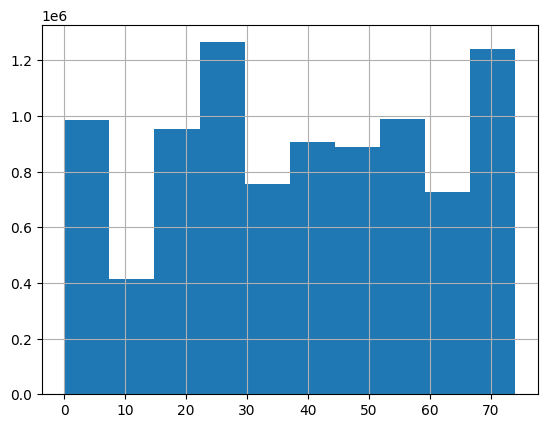

In [99]:
df_all['Cluster_No'].hist();

## Load models

In [21]:
cl = ['75','250', '500', '2500', '5000']
feat = ['allfeat', 'lesssoilfeat']
folder = '/Users/davidschildberger/code/dadavie/planetary_garden/models/models'

In [152]:
## Load
file_md = f"{folder}/model_kmeansbatch_{cl[0]}_hist_clim_soil_robscal_{feat[0]}.sav"
kmeans = pickle.load(open(file_md, 'rb'))
file_sc = f'{folder}/robscaler_{feat[0]}.save'
scaler = pickle.load(open(file_sc, 'rb'))

## Project - Species

In [100]:
def get_plant_features():
    df = pd.read_csv("/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/gbif_mod_data/plant_data_wo_LC.csv", on_bad_lines='skip',  index_col=0)
    return df

In [101]:
df_plant_info = get_plant_features()

In [102]:
df_plant_info.head()

datasetKey  kingdom        phylum  \
gbifID                                                                    
3978656031  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
3978655841  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
3978653365  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
3978653056  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
3978652475  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   

                    class      order      family         genus  \
gbifID                                                           
3978656031  Magnoliopsida    Fabales    Fabaceae      Swartzia   
3978655841  Magnoliopsida    Fabales    Fabaceae      Swartzia   
3978653365  Magnoliopsida  Asterales  Asteraceae  Critoniopsis   
3978653056  Magnoliopsida    Fabales    Fabaceae      Swartzia   
3978652475  Magnoliopsida    Fabales    Fabaceae      Swartzia   

                         species                        scientificName  \
gbifID                                                                   
3978656031       Swartzia oraria             Swartzia oraria R.S.Cowan   
3978655841       Swartzia oraria             Swartzia oraria R.S.Cowan   
3978653365  Critoniopsis cinerea  Critoniopsis cinerea S.Díaz & Obando   
3978653056       Swartzia oraria             Swartzia oraria R.S.Cowan   
3978652475       Swartzia oraria             Swartzia oraria R.S.Cowan   

           verbatimScientificName countryCode                locality  \
gbifID                                                                  
3978656031        Swartzia oraria          CO                     NaN   
3978655841        Swartzia oraria          CO                 Macajan   
3978653365   Critoniopsis cinerea          CO                 Lasuras   
3978653056        Swartzia oraria          CO  Remanso - Chorro Bocon   
3978652475        Swartzia oraria          CO                     NaN   

           stateProvince  decimalLatitude  decimalLongitude  year red_flag  
gbifID                                                                      
3978656031      Amazonas         -1.36560         -72.80951  2015       CR  
3978655841        Nariño          1.73971         -77.94002  2017       CR  
3978653365  Bogotá, D.C.          4.16995         -74.15965  2016       CR  
3978653056       Guainía          3.35987         -67.94903  2015       CR  
3978652475      Amazonas         -1.36560         -72.80951  2015       CR

In [103]:
df_plant_info = df_plant_info[(df_plant_info['year']>=1901) & (df_plant_info['year']<=2021)]
df_plant_info.reset_index(inplace=True)
df_plant_info.shape

(521652, 18)

In [104]:
filename = 'plant_data_wo_LC_bioclim_soil.csv'
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/gbif_mod_data/'
df = pd.read_csv(path+filename, index_col=0)
df.dropna(inplace=True)

In [105]:
df.shape

(462250, 79)

In [106]:
df_plant_info = pd.merge(df_plant_info, df,  how='right', left_index=True, right_index=True)
df_plant_info.shape

(462250, 97)

In [107]:
df_plant_info.head()

gbifID                            datasetKey  kingdom        phylum  \
0  3978656031  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
1  3978655841  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
2  3978653365  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
3  3978653056  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
4  3978652475  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   

           class      order      family         genus               species  \
0  Magnoliopsida    Fabales    Fabaceae      Swartzia       Swartzia oraria   
1  Magnoliopsida    Fabales    Fabaceae      Swartzia       Swartzia oraria   
2  Magnoliopsida  Asterales  Asteraceae  Critoniopsis  Critoniopsis cinerea   
3  Magnoliopsida    Fabales    Fabaceae      Swartzia       Swartzia oraria   
4  Magnoliopsida    Fabales    Fabaceae      Swartzia       Swartzia oraria   

                         scientificName  ...   sg51   sg52   sg53   sg54  \
0             Swartzia oraria R.S.Cowan  ...  261.0  211.0  189.0  216.0   
1             Swartzia oraria R.S.Cowan  ...  468.0  324.0  237.0  208.0   
2  Critoniopsis cinerea S.Díaz & Obando  ...  214.0  143.0  129.0  116.0   
3             Swartzia oraria R.S.Cowan  ...  152.0  135.0  116.0  117.0   
4             Swartzia oraria R.S.Cowan  ...  261.0  211.0  189.0  216.0   

    sg55   sg56   sg57   sg58   sg59   sg60  
0  577.0  288.0  169.0   87.0   51.0   31.0  
1  557.0  494.0  397.0  372.0  219.0  175.0  
2  416.0  309.0  227.0  103.0   66.0   52.0  
3  343.0  281.0  173.0   94.0   63.0   32.0  
4  577.0  288.0  169.0   87.0   51.0   31.0  

[5 rows x 97 columns]

In [108]:
samples = df.sample(n = 5)

In [109]:
samples.columns = df_all.iloc[:,3:-1].columns.values.tolist()
samples.head()

3      4     5     6          7          8          9          10  \
515234   7.37   5.38  0.18  7.16  22.500000  -4.800000  29.600000   4.270000   
482148  27.08  11.37  0.63  1.57  36.599998  18.700001  18.100000  25.330000   
456877  27.43  11.88  0.63  1.60  37.500000  18.600000  18.799999  25.600000   
99390   22.76   8.61  0.74  0.61  28.400000  17.900000  11.600000  22.299999   
103665  22.76   8.61  0.74  0.61  28.400000  17.900000  11.600000  22.299999   

               11         12  ...     72     73     74     75     76     77  \
515234   9.530000  16.670000  ...  558.0  534.0  527.0  547.0  643.0  604.0   
482148  28.600000  28.600000  ...   65.0   51.0   41.0   24.0  184.0  150.0   
456877  28.770000  28.770000  ...  114.0   58.0   36.0   25.0  227.0  175.0   
99390   23.469999  23.469999  ...  241.0  136.0  122.0  120.0  426.0  326.0   
103665  23.469999  23.469999  ...  241.0  136.0  122.0  120.0  426.0  326.0   

           78     79     80    81  
515234  430.0  134.0  107.0  89.0  
482148   91.0   62.0   40.0  25.0  
456877  116.0   85.0   45.0  34.0  
99390   236.0  106.0   91.0  68.0  
103665  236.0  106.0   91.0  68.0  

[5 rows x 79 columns]

In [110]:
## in case not all features are used
samples = get_mean_soilgrid_columns(samples)

In [111]:
sel_pred_sc = scaler.transform(samples.values)
kmeans.predict(sel_pred_sc)

array([37, 72, 56, 15, 15], dtype=int32)

In [112]:
dd_sel = df_all[df_all['Cluster_No']==37]
dd_sel

0      1      2         3         4     5     6     7          8  \
3823       0.0   32.0  469.0 -8.391667  7.350000  0.23  8.83   9.3 -23.299999   
4350       0.0   34.0  465.0 -6.566667  7.491667  0.25  8.09  10.0 -20.400000   
4351       0.0   34.0  466.0 -7.258335  7.483334  0.24  8.28   9.7 -21.200001   
4638       0.0   35.0  465.0 -6.433334  7.550001  0.25  8.15  10.3 -20.200001   
4639       0.0   35.0  466.0 -7.533333  7.525001  0.24  8.37   9.6 -21.500000   
...        ...    ...    ...       ...       ...   ...   ...   ...        ...   
8157099  120.0  289.0  225.0  5.250000  7.460000  0.47  2.78  13.6  -1.500000   
8157101  120.0  289.0  227.0  5.420000  7.290000  0.46  2.74  13.6  -1.200000   
8157102  120.0  289.0  228.0  5.510000  7.220000  0.46  2.70  13.7  -1.000000   
8157116  120.0  290.0  224.0  6.120000  7.410000  0.48  2.53  14.1  -0.300000   
8157117  120.0  290.0  225.0  6.480000  7.220000  0.48  2.54  14.4   0.200000   

                 9  ...      73      74      75     76     77     78     79  \
3823     32.599998  ...   752.0   666.0   711.0  561.0  476.0  371.0  249.0   
4350     30.200001  ...   769.0   593.0   622.0  632.0  482.0  371.0  250.0   
4351     30.799999  ...   679.0   547.0   578.0  579.0  485.0  360.0  214.0   
4638     30.400000  ...   596.0   521.0   564.0  636.0  486.0  367.0  195.0   
4639     31.200001  ...   596.0   521.0   564.0  636.0  486.0  367.0  195.0   
...            ...  ...     ...     ...     ...    ...    ...    ...    ...   
8157099  16.000000  ...  1383.0  1265.0  1288.0  725.0  556.0  411.0  354.0   
8157101  15.900000  ...   814.0   761.0   804.0  735.0  545.0  413.0  399.0   
8157102  15.800000  ...   991.0   858.0   867.0  669.0  499.0  416.0  400.0   
8157116  15.300000  ...  1230.0  1186.0  1200.0  676.0  596.0  475.0  449.0   
8157117  15.200000  ...  1066.0  1025.0  1093.0  658.0  529.0  429.0  381.0   

            80     81  Cluster_No  
3823     237.0  223.0          37  
4350     217.0  201.0          37  
4351     215.0  184.0          37  
4638     191.0  175.0          37  
4639     191.0  175.0          37  
...        ...    ...         ...  
8157099  313.0  314.0          37  
8157101  362.0  376.0          37  
8157102  361.0  372.0          37  
8157116  436.0  454.0          37  
8157117  366.0  382.0          37  

[127174 rows x 83 columns]

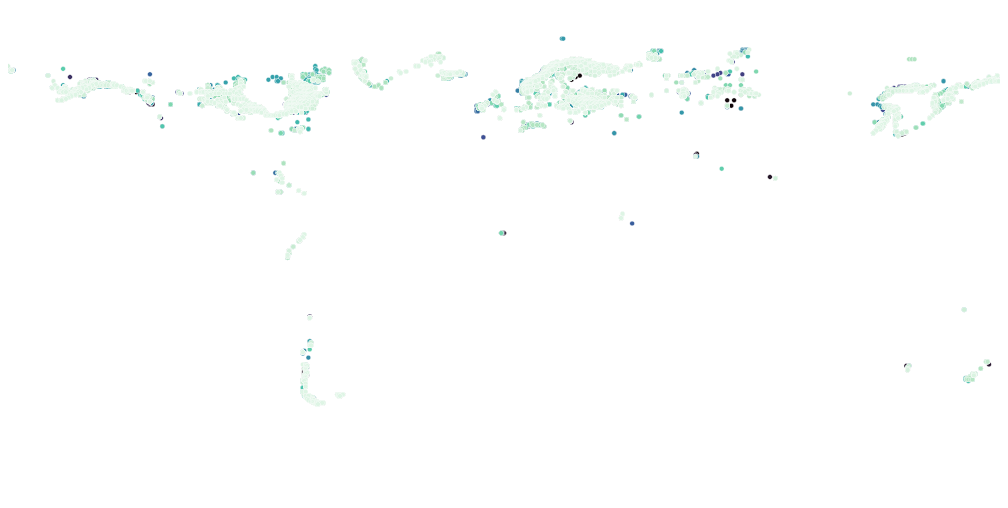

In [113]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=dd_sel,  x=2, y=1, hue=0, legend=False, palette="mako", size=0.01)
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

## Get clusters for all species

In [115]:
df.columns = df_all.iloc[:,3:-1].columns.values.tolist()
## in case not all features are used
df = get_mean_soilgrid_columns(df)

In [116]:
sel_pred_sc = scaler.transform(df.values)
pred_cl = kmeans.predict(sel_pred_sc)
pred_cl

array([40, 69, 15, ..., 50,  7, 37], dtype=int32)

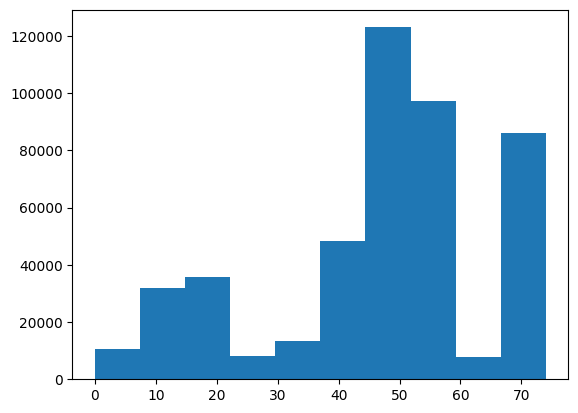

In [117]:
plt.hist(pred_cl);

In [32]:
df.head()

b1     b2    b3    b4         b5         b6    b7         b8  \
0  26.980000  10.03  0.73  0.52  33.200001  21.299999  13.7  26.870001   
1  14.780000   8.88  0.79  0.37  20.500000   9.300000  11.3  15.030000   
2  25.500000   8.72  0.73  0.81  32.200001  20.299999  12.0  24.900000   
3  27.799999   9.76  0.73  0.58  34.200001  22.500000  13.3  27.230000   
4  26.980000  10.03  0.73  0.52  33.200001  21.299999  13.7  26.870001   

          b9        b10  ...   sg51   sg52   sg53   sg54   sg55   sg56   sg57  \
0  27.600000  27.600000  ...  261.0  211.0  189.0  216.0  577.0  288.0  169.0   
1  14.730000  14.730000  ...  468.0  324.0  237.0  208.0  557.0  494.0  397.0   
2  26.700001  26.700001  ...  214.0  143.0  129.0  116.0  416.0  309.0  227.0   
3  28.230000  28.230000  ...  152.0  135.0  116.0  117.0  343.0  281.0  173.0   
4  27.600000  27.600000  ...  261.0  211.0  189.0  216.0  577.0  288.0  169.0   

    sg58   sg59   sg60  
0   87.0   51.0   31.0  
1  372.0  219.0  175.0  
2  103.0   66.0   52.0  
3   94.0   63.0   32.0  
4   87.0   51.0   31.0  

[5 rows x 79 columns]

In [118]:
df_plant_info['Cluster'] = pred_cl

In [119]:
df_plant_info

gbifID                            datasetKey  kingdom  \
0       3978656031  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae   
1       3978655841  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae   
2       3978653365  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae   
3       3978653056  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae   
4       3978652475  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae   
...            ...                                   ...      ...   
521647  1431349977  38b4c89f-584c-41bb-bd8f-cd1def33e92f  Plantae   
521648  3432280942  38b4c89f-584c-41bb-bd8f-cd1def33e92f  Plantae   
521649  2604324447  38b4c89f-584c-41bb-bd8f-cd1def33e92f  Plantae   
521650  2604343603  38b4c89f-584c-41bb-bd8f-cd1def33e92f  Plantae   
521651  1429962713  38b4c89f-584c-41bb-bd8f-cd1def33e92f  Plantae   

              phylum          class       order       family         genus  \
0       Tracheophyta  Magnoliopsida     Fabales     Fabaceae      Swartzia   
1       Tracheophyta  Magnoliopsida     Fabales     Fabaceae      Swartzia   
2       Tracheophyta  Magnoliopsida   Asterales   Asteraceae  Critoniopsis   
3       Tracheophyta  Magnoliopsida     Fabales     Fabaceae      Swartzia   
4       Tracheophyta  Magnoliopsida     Fabales     Fabaceae      Swartzia   
...              ...            ...         ...          ...           ...   
521647  Tracheophyta  Magnoliopsida  Sapindales  Sapindaceae      Aesculus   
521648  Tracheophyta  Magnoliopsida  Sapindales  Sapindaceae      Aesculus   
521649  Tracheophyta  Magnoliopsida  Sapindales  Sapindaceae      Aesculus   
521650  Tracheophyta  Magnoliopsida  Sapindales  Sapindaceae      Aesculus   
521651  Tracheophyta  Magnoliopsida  Sapindales  Sapindaceae      Aesculus   

                       species                        scientificName  ...  \
0              Swartzia oraria             Swartzia oraria R.S.Cowan  ...   
1              Swartzia oraria             Swartzia oraria R.S.Cowan  ...   
2         Critoniopsis cinerea  Critoniopsis cinerea S.Díaz & Obando  ...   
3              Swartzia oraria             Swartzia oraria R.S.Cowan  ...   
4              Swartzia oraria             Swartzia oraria R.S.Cowan  ...   
...                        ...                                   ...  ...   
521647  Aesculus hippocastanum             Aesculus hippocastanum L.  ...   
521648  Aesculus hippocastanum             Aesculus hippocastanum L.  ...   
521649  Aesculus hippocastanum             Aesculus hippocastanum L.  ...   
521650  Aesculus hippocastanum             Aesculus hippocastanum L.  ...   
521651  Aesculus hippocastanum             Aesculus hippocastanum L.  ...   

         sg52   sg53   sg54   sg55   sg56   sg57   sg58   sg59   sg60  Cluster  
0       211.0  189.0  216.0  577.0  288.0  169.0   87.0   51.0   31.0       40  
1       324.0  237.0  208.0  557.0  494.0  397.0  372.0  219.0  175.0       69  
2       143.0  129.0  116.0  416.0  309.0  227.0  103.0   66.0   52.0       15  
3       135.0  116.0  117.0  343.0  281.0  173.0   94.0   63.0   32.0       32  
4       211.0  189.0  216.0  577.0  288.0  169.0   87.0   51.0   31.0       40  
...       ...    ...    ...    ...    ...    ...    ...    ...    ...      ...  
521647  387.0  367.0  394.0    0.0    0.0    0.0    0.0    0.0    0.0        8  
521648  246.0  222.0  245.0  526.0  505.0  378.0  117.0   85.0   64.0       69  
521649    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       50  
521650  374.0  373.0  370.0  642.0  521.0  392.0  182.0  181.0  151.0        7  
521651  306.0  315.0  334.0  576.0  536.0  359.0  155.0  117.0  103.0       37  

[462250 rows x 98 columns]

In [120]:
## save above Plants with clusters
df_plant_info.to_csv("/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/Frontend_DF/RedFlag_species_alldata_inkl_futureCL_inklClusters.csv")

In [121]:
df_plant_info['species'].nunique()

1260

In [122]:
df_spec = df_plant_info.groupby('species')['Cluster'].apply(lambda x: list(x.unique())).reset_index()
df_spec

species                      Cluster
0          Abies bracteata                     [38, 69]
1            Abies fraseri                         [57]
2         Abies holophylla             [55, 50, 37, 45]
3          Abies homolepis     [37, 69, 50, 55, 22, 23]
4            Abies koreana  [69, 50, 55, 2, 37, 14, 42]
...                    ...                          ...
1255   Zanthoxylum gentryi                         [32]
1256  Zanthoxylum harrisii                         [74]
1257  Zelkova carpinifolia                     [69, 29]
1258       Zelkova serrata  [50, 57, 55, 2, 69, 14, 42]
1259     Zygia hernandezii                         [15]

[1260 rows x 2 columns]

In [123]:
## Save above - occurence species - clusters
df_spec.to_csv("/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/Frontend_DF/RedFlag_species_occ_inkl_futureCL_clusters.csv")

In [125]:
dd_sel = df_all[df_all['Cluster_No'].isin(df_spec.loc[1258,'Cluster'])]
dd_sel

0      1      2          3         4     5       6     7  \
184        0.0   15.0  201.0 -25.016668  6.475000  0.14   15.72   1.5   
185        0.0   15.0  202.0 -25.783333  6.449999  0.14   15.61   0.6   
186        0.0   15.0  203.0 -25.708330  6.458334  0.14   15.53   0.5   
187        0.0   15.0  204.0 -26.633333  6.450001  0.14   15.43  -0.6   
190        0.0   15.0  207.0 -24.833336  6.466666  0.14   15.13   0.6   
...        ...    ...    ...        ...       ...   ...     ...   ...   
8157119  120.0  291.0  223.0   6.480000  7.120000  0.51    2.13  13.9   
8157120  120.0  291.0  224.0   6.580000  7.050000  0.50    2.19  14.0   
8157121  120.0  291.0  225.0   6.210000  7.010000  0.50    2.18  13.6   
8157779  121.0   18.0  327.0   3.800000  0.300000  3.10  250.00   8.6   
8398327  125.0   18.0  327.0   4.100000  0.200000  2.20  262.30   9.2   

                 8          9  ...   73   74   75     76     77     78     79  \
184     -50.900002  47.500000  ...  0.0  0.0  0.0  503.0  431.0  321.0  235.0   
185     -51.599998  47.299999  ...  0.0  0.0  0.0  503.0  431.0  321.0  235.0   
186     -51.500000  47.099998  ...  0.0  0.0  0.0    0.0    0.0    0.0    0.0   
187     -52.200001  46.799999  ...  0.0  0.0  0.0    0.0    0.0    0.0    0.0   
190     -50.299999  46.200001  ...  0.0  0.0  0.0    0.0    0.0    0.0    0.0   
...            ...        ...  ...  ...  ...  ...    ...    ...    ...    ...   
8157119   0.500000  14.000000  ...  0.0  0.0  0.0    0.0    0.0    0.0    0.0   
8157120   0.500000  14.200000  ...  0.0  0.0  0.0    0.0    0.0    0.0    0.0   
8157121   0.100000  14.100000  ...  0.0  0.0  0.0    0.0    0.0    0.0    0.0   
8157779  -0.100000   8.700000  ...  0.0  0.0  0.0    0.0    0.0    0.0    0.0   
8398327  -0.200000   9.400000  ...  0.0  0.0  0.0    0.0    0.0    0.0    0.0   

            80     81  Cluster_No  
184      206.0  195.0          42  
185      206.0  195.0          42  
186        0.0    0.0          42  
187        0.0    0.0          42  
190        0.0    0.0          42  
...        ...    ...         ...  
8157119    0.0    0.0          50  
8157120    0.0    0.0          50  
8157121    0.0    0.0          50  
8157779    0.0    0.0          42  
8398327    0.0    0.0          42  

[1116070 rows x 83 columns]

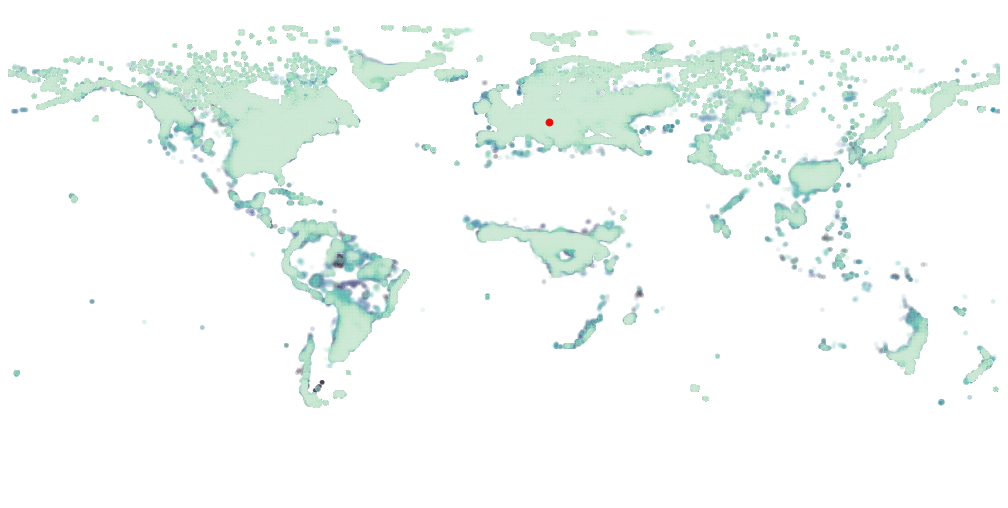

In [126]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=dd_sel,  x=2, y=1, hue=0, legend=False, palette="mako", size=0.01, alpha=0.1)
g.scatter(x=393, y=84, color='r')
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

## Project - climate

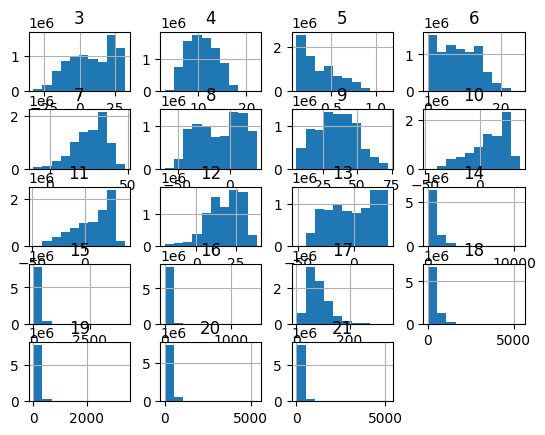

In [183]:
## distribution features historical data
sel_data.hist();

In [46]:
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/'
filename = 'future_clim_soilgr.npy'
cl_fut = np.load(path+filename, allow_pickle=True)

In [117]:
cl_fut.shape

(16, 60137, 81)

In [118]:
pr_df = pd.DataFrame(cl_fut[0])
pr_df = pr_df.astype(float)
pr_df.describe()

0             1             2             3             4   \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     113.453481    395.507907     10.673870     11.174756     38.559810   
std       63.790355    168.742113     14.273984      3.034159     19.624384   
min       12.000000      0.000000    -25.200000      0.200000      2.100000   
25%       60.000000    238.000000     -0.700000      8.900000     22.600000   
50%       99.000000    414.000000     11.100000     11.300000     32.800000   
75%      159.000000    540.000000     24.600000     13.500000     51.700000   
max      289.000000    719.000000     32.500000     20.800000     94.100000   

                 5             6             7             8             9   \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     848.207117     28.361225     -6.158131     34.519356     18.016411   
std      509.712124     10.477409     18.815348     13.323580     10.848456   
min       13.400000     -7.300000    -46.900000      4.100000    -36.500000   
25%      424.600000     23.000000    -22.800000     24.800000     12.400000   
50%      851.400000     29.900000     -4.800000     34.000000     19.600000   
75%     1264.400000     35.400000     10.500000     44.900000     26.200000   
max     2330.200000     50.300000     25.000000     72.000000     39.900000   

       ...            71            72            73            74  \
count  ...  60137.000000  60137.000000  60137.000000  60137.000000   
mean   ...    277.275404    227.994862    208.182966    239.383740   
std    ...    341.405908    316.362204    314.202949    376.103008   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     61.000000     43.000000     33.000000     29.000000   
50%    ...    144.000000     98.000000     73.000000     71.000000   
75%    ...    373.000000    297.000000    265.000000    311.000000   
max    ...   4858.000000   4848.000000   4775.000000   5271.000000   

                 75            76            77            78            79  \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     345.614347    243.713637    183.391972    121.991054     88.998321   
std      219.842969    141.139252    105.656061     79.136814     67.778923   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      166.000000    143.000000    117.000000     77.000000     54.000000   
50%      336.000000    245.000000    179.000000    109.000000     75.000000   
75%      540.000000    352.000000    254.000000    164.000000    114.000000   
max      967.000000    917.000000    930.000000    840.000000    860.000000   

                 80  
count  60137.000000  
mean      76.540981  
std       67.789600  
min        0.000000  
25%       37.000000  
50%       59.000000  
75%      102.000000  
max      911.000000  

[8 rows x 81 columns]

In [24]:
pr_df = pd.DataFrame(cl_fut[15])
pr_df = pr_df.astype(float)
pr_df.describe()

0             1             2             3             4   \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     113.453481    395.507907     16.368863     11.112501     38.205454   
std       63.790355    168.742113     13.500825      3.152218     19.125707   
min       12.000000      0.000000    -19.700000     -0.800000     -8.500000   
25%       60.000000    238.000000      5.800000      9.000000     22.700000   
50%       99.000000    414.000000     16.200000     11.300000     32.100000   
75%      159.000000    540.000000     29.500000     13.500000     51.100000   
max      289.000000    719.000000     38.000000     20.900000     92.700000   

                 5             6             7             8             9   \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     828.717345     34.202070      0.295938     33.905847     22.436157   
std      473.932443     10.738382     17.016252     12.654419     11.152557   
min       18.000000     -3.600000    -38.500000      6.400000    -31.300000   
25%      428.100000     29.400000    -14.200000     24.500000     15.500000   
50%      863.900000     36.100000     -0.100000     33.400000     24.700000   
75%     1196.400000     41.400000     15.500000     43.300000     31.100000   
max     2229.000000     56.000000     30.300000     69.600000     45.900000   

       ...            71            72            73            74  \
count  ...  60137.000000  60137.000000  60137.000000  60137.000000   
mean   ...    210.770391    210.770391    210.770391    210.770391   
std    ...    103.173095    103.173095    103.173095    103.173095   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...    166.000000    166.000000    166.000000    166.000000   
50%    ...    219.000000    219.000000    219.000000    219.000000   
75%    ...    274.000000    274.000000    274.000000    274.000000   
max    ...    659.000000    659.000000    659.000000    659.000000   

                 75            76            77            78            79  \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     210.770391    210.770391    210.770391    210.770391    210.770391   
std      103.173095    103.173095    103.173095    103.173095    103.173095   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      166.000000    166.000000    166.000000    166.000000    166.000000   
50%      219.000000    219.000000    219.000000    219.000000    219.000000   
75%      274.000000    274.000000    274.000000    274.000000    274.000000   
max      659.000000    659.000000    659.000000    659.000000    659.000000   

                 80  
count  60137.000000  
mean     210.770391  
std      103.173095  
min        0.000000  
25%      166.000000  
50%      219.000000  
75%      274.000000  
max      659.000000  

[8 rows x 81 columns]

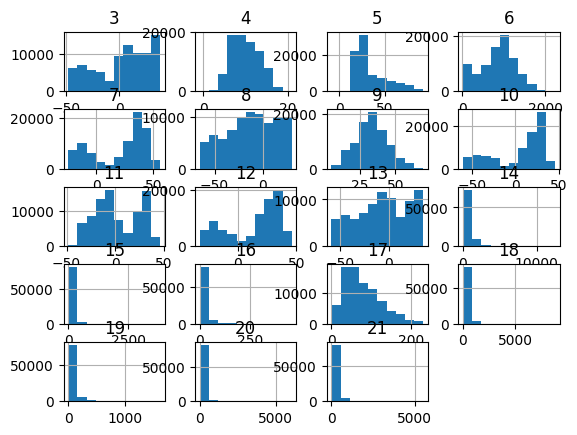

In [199]:
## distribution features future climate predictions
pr_df.iloc[:, 3:].hist();

In [37]:
pr_sel = pr_df.sample(n = 5)
pr_sel

0      1     2     3     4      5     6     7     8     9   ...  \
51809  200.0  419.0  28.1  12.7  62.6  159.4  38.2  17.8  20.3  28.0  ...   
14802   60.0   57.0  10.1   6.8  31.5  588.2  22.8   1.1  21.7   4.7  ...   
52558  206.0  232.0  34.3  12.2  61.5  180.8  44.6  24.7  19.9  34.1  ...   
55301  222.0  453.0  26.2  12.0  60.2  273.8  35.8  15.9  19.9  28.8  ...   
56116  227.0  252.0  27.8  12.8  60.5  302.1  37.9  16.8  21.1  29.6  ...   

          71     72     73     74     75     76     77     78     79     80  
51809  223.0  223.0  223.0  223.0  223.0  223.0  223.0  223.0  223.0  223.0  
14802   65.0   65.0   65.0   65.0   65.0   65.0   65.0   65.0   65.0   65.0  
52558  206.0  206.0  206.0  206.0  206.0  206.0  206.0  206.0  206.0  206.0  
55301  287.0  287.0  287.0  287.0  287.0  287.0  287.0  287.0  287.0  287.0  
56116  355.0  355.0  355.0  355.0  355.0  355.0  355.0  355.0  355.0  355.0  

[5 rows x 81 columns]

In [38]:
fcl_sam = pr_sel.iloc[:,2:]

In [39]:
sel_pred_cl = scaler.transform(fcl_sam.values)
kmeans.predict(sel_pred_cl)

array([429, 166, 133,  63, 300], dtype=int32)

In [40]:
cl_sel = dd[dd['Cluster_No']==300]

In [41]:
cl_sel.describe()

0             1             2             3             4  \
count  15614.000000  15614.000000  15614.000000  15614.000000  15614.000000   
mean      56.069233    182.130076    509.063405     25.237377      9.540754   
std       35.177303     13.672377    167.564360      2.281837      1.858523   
min        0.000000     89.000000     15.000000     10.158334      5.160000   
25%       25.000000    176.000000    459.000000     24.516665      8.349999   
50%       54.000000    183.000000    590.000000     25.916666      9.216666   
75%       86.000000    188.000000    616.000000     26.629999     10.338333   
max      120.000000    262.000000    719.000000     29.059999     17.620001   

                  5             6             7             8             9  \
count  15614.000000  15614.000000  15614.000000  15614.000000  15614.000000   
mean       0.814803      0.566531     31.160971     19.510811     11.826073   
std        0.084088      0.680713      1.704907      3.375503      2.644981   
min        0.220000      0.130000     17.700001     -4.000000      7.200000   
25%        0.780000      0.340000     30.500000     18.600000     10.300000   
50%        0.830000      0.420000     31.500000     20.500000     11.400000   
75%        0.870000      0.570000     32.200001     21.600000     12.600000   
max        1.080000      9.300000     35.400002     24.500000     37.000000   

       ...            73            74            75            76  \
count  ...  15614.000000  15614.000000  15614.000000  15614.000000   
mean   ...    363.093442    363.093442    363.093442    363.093442   
std    ...     16.797483     16.797483     16.797483     16.797483   
min    ...    325.000000    325.000000    325.000000    325.000000   
25%    ...    350.000000    350.000000    350.000000    350.000000   
50%    ...    363.000000    363.000000    363.000000    363.000000   
75%    ...    377.000000    377.000000    377.000000    377.000000   
max    ...    405.000000    405.000000    405.000000    405.000000   

                 77            78            79            80            81  \
count  15614.000000  15614.000000  15614.000000  15614.000000  15614.000000   
mean     363.093442    363.093442    363.093442    363.093442    363.093442   
std       16.797483     16.797483     16.797483     16.797483     16.797483   
min      325.000000    325.000000    325.000000    325.000000    325.000000   
25%      350.000000    350.000000    350.000000    350.000000    350.000000   
50%      363.000000    363.000000    363.000000    363.000000    363.000000   
75%      377.000000    377.000000    377.000000    377.000000    377.000000   
max      405.000000    405.000000    405.000000    405.000000    405.000000   

       Cluster_No  
count     15614.0  
mean        300.0  
std           0.0  
min         300.0  
25%         300.0  
50%         300.0  
75%         300.0  
max         300.0  

[8 rows x 83 columns]

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_9107/775013716.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)


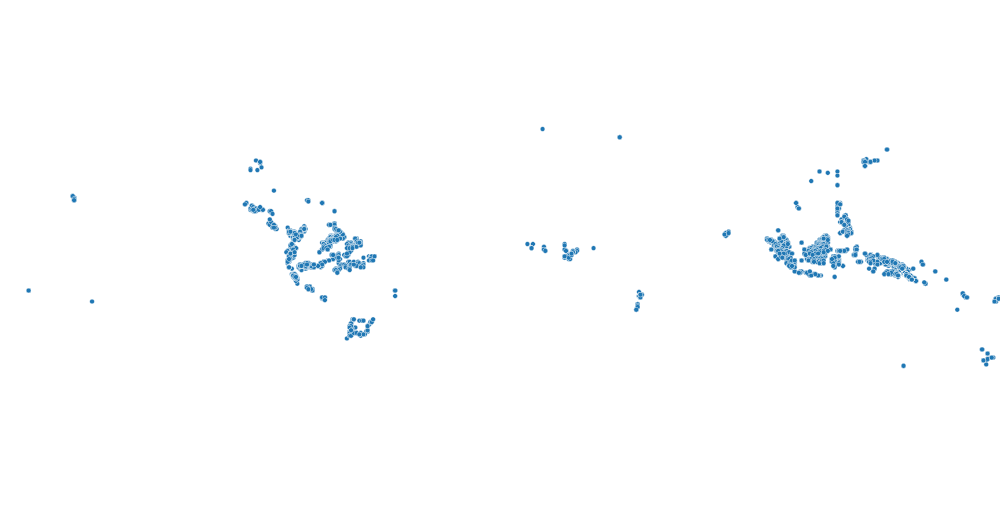

In [42]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

# Bounding Box - Selection of Plants - History + Today

In [172]:
df_plant_info['c_lat'] = df_plant_info['decimalLatitude'].apply(lambda x: int(round(np.interp(x, [-90, 90], [360, 0]))))
df_plant_info['c_lon']= df_plant_info['decimalLongitude'].apply(lambda x: int(round(np.interp(x, [-180, 180], [0, 720]))))

In [173]:
df_plant_info.head()

gbifID                            datasetKey  kingdom        phylum  \
0  3978656031  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
1  3978655841  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
2  3978653365  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
3  3978653056  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   
4  3978652475  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae  Tracheophyta   

           class      order      family         genus               species  \
0  Magnoliopsida    Fabales    Fabaceae      Swartzia       Swartzia oraria   
1  Magnoliopsida    Fabales    Fabaceae      Swartzia       Swartzia oraria   
2  Magnoliopsida  Asterales  Asteraceae  Critoniopsis  Critoniopsis cinerea   
3  Magnoliopsida    Fabales    Fabaceae      Swartzia       Swartzia oraria   
4  Magnoliopsida    Fabales    Fabaceae      Swartzia       Swartzia oraria   

                         scientificName  ...   sg54   sg55   sg56   sg57  \
0             Swartzia oraria R.S.Cowan  ...  216.0  577.0  288.0  169.0   
1             Swartzia oraria R.S.Cowan  ...  208.0  557.0  494.0  397.0   
2  Critoniopsis cinerea S.Díaz & Obando  ...  116.0  416.0  309.0  227.0   
3             Swartzia oraria R.S.Cowan  ...  117.0  343.0  281.0  173.0   
4             Swartzia oraria R.S.Cowan  ...  216.0  577.0  288.0  169.0   

    sg58   sg59   sg60 Cluster  c_lat  c_lon  
0   87.0   51.0   31.0      73    183    214  
1  372.0  219.0  175.0      39    177    204  
2  103.0   66.0   52.0      59    172    212  
3   94.0   63.0   32.0      11    173    224  
4   87.0   51.0   31.0      73    183    214  

[5 rows x 100 columns]

In [174]:
df_plant_info.shape

(462250, 100)

In [175]:
lat = 48.2
lon = 16.3

In [176]:
c_lat = int(round(np.interp(lat, [-90, 90], [360, 0])))  # check order of values here
c_lon = int(round(np.interp(lon, [-180, 180], [0, 720])))

In [177]:
c_lat, c_lon

(84, 393)

In [203]:
## get unique combinations of lat/lon - in case lon lat not available
dd[[1, 2]].value_counts().reset_index(name='count')

ss = dd[dd[2]==c_lon]
ss.iloc[(ss[1]-c_lat).abs().argsort()[:2]]

1      2  count
0       12.0  284.0    121
1      135.0  332.0    121
2      135.0  334.0    121
3      135.0  335.0    121
4      135.0  336.0    121
...      ...    ...    ...
67414  133.0  420.0     65
67415  132.0  421.0     58
67416  227.0  218.0     57
67417  132.0  420.0     55
67418  133.0  421.0     49

[67419 rows x 3 columns]

In [178]:
cl_no = dd[(dd[1]==c_lat) & (dd[2]==c_lon)]['Cluster_No'].unique()[0]
cl_no

70

In [179]:
cl_sel = dd[dd['Cluster_No']==cl_no]

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_1316/562466471.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)


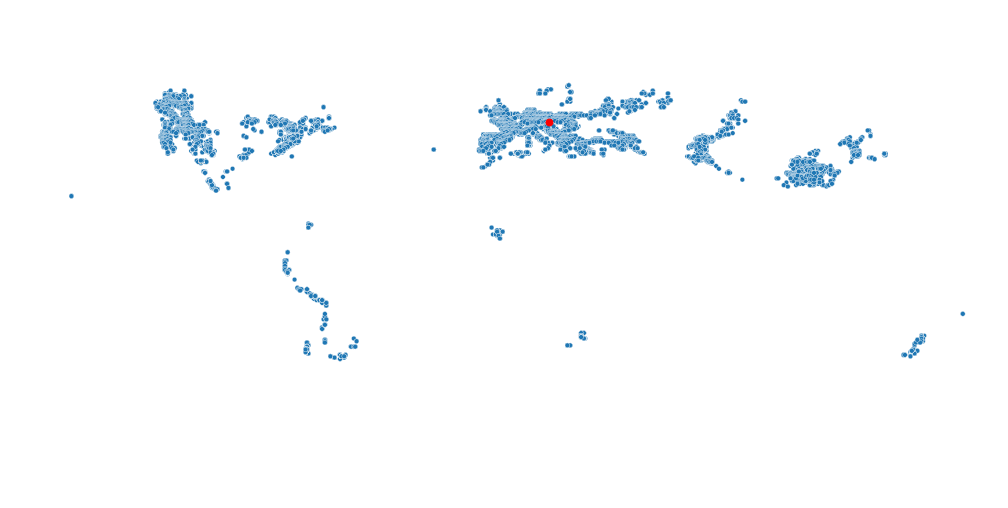

In [180]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)
g.scatter(x=c_lon, y=c_lat, color='r')
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

In [181]:
df_plant_info[(df_plant_info['Cluster']==cl_no)]['species'].unique()

array(['Fraxinus pennsylvanica', 'Lathyrus odoratus',
       'Fraxinus americana', 'Medicago arborea',
       'Pseudomisopates rivas-martinezii', 'Jurinea fontqueri',
       'Gyrocaryum oppositifolium', 'Echinospartum ibericum',
       'Dioscorea chouardii', 'Astragalus devesae', 'Pitavia punctata',
       'Cousinia knorringiae', 'Echium pininana', 'Anarrhinum duriminium',
       'Metasequoia glyptostroboides', 'Picea omorika',
       'Araucaria araucana', 'Juglans cinerea', 'Syringa josikaea',
       'Silene diclinis', 'Jasione foliosa', 'Silene hifacensis',
       'Cedrus atlantica', 'Kalanchoe daigremontiana',
       'Marsilea batardae', 'Poa laxa', 'Sequoia sempervirens',
       'Genista tribracteolata', 'Picris cupuligera',
       'Narcissus nevadensis', 'Narcissus bugei', 'Glandora nitida',
       'Eryngium viviparum', 'Crepis granatensis',
       'Antirrhinum lopesianum', 'Fraxinus excelsior', 'Sonchus arvensis',
       'Pulsatilla vulgaris', 'Galanthus nivalis',
       'Baldell

In [239]:
## fill dataframe with plant species per cluster
df_feat = pd.DataFrame(columns=['species_past_today'], index = [np.arange(0,75)])
for i in range(75):
    df_feat.iloc[i,0] = df_plant_info[(df_plant_info['Cluster']==i)]['species'].unique()

In [240]:
df_feat

species_past_today
0   [Magnolia jardinensis, Epidendrum uribei, Swar...
1   [Fraxinus pennsylvanica, Fraxinus americana, S...
2   [Fraxinus pennsylvanica, Lathyrus odoratus, Fr...
3   [Sideritis serrata, Silene diclinis, Narcissus...
4   [Dombeya ledermannii, Centrolobium ochroxylum,...
..                                                ...
70  [Fraxinus pennsylvanica, Lathyrus odoratus, Fr...
71  [Lathyrus odoratus, Fraxinus pennsylvanica, Fr...
72  [Fraxinus pennsylvanica, Fraxinus americana, L...
73  [Swartzia oraria, Chrysophyllum superbum, Esch...
74  [Lathyrus odoratus, Sequoiadendron giganteum, ...

[75 rows x 1 columns]

# Bounding box - future climate - return Plants

In [182]:
file_fut = 'future_clim_soilgr.npy'
cl_fut = np.load(path+file_fut, allow_pickle=True)

In [183]:
dict_scen = {'ssp126' : 1,
              'sp245' : 2,
              'ssp370' : 3,
              'ssp585' : 4,
             }

In [184]:
dict_time = {'2021-2040' : 1,
              '2041-2060' : 2,
              '2061-2080' : 3,
              '2081-2100' : 4,
             }

In [312]:
sel = dict_scen['ssp126']*dict_time['2081-2100']-1

In [313]:
pr_df = pd.DataFrame(cl_fut[sel])
pr_df = pr_df.astype(float)

In [314]:
lat = 48.2
lon = 16.3

In [315]:
c_lat = int(round(np.interp(lat, [-90, 90], [360, 0])))  # check order of values here
c_lon = int(round(np.interp(lon, [-180, 180], [0, 720])))

In [316]:
c_lat, c_lon

(84, 393)

In [299]:
pr_sel = pr_df[(pr_df[0]==c_lat)&(pr_df[1]==c_lon)]
pr_sel

0      1     2     3     4      5     6    7     8     9   ...  \
24687  84.0  393.0  16.8  10.6  31.9  866.0  35.7  2.5  33.2  25.6  ...   

          71    72    73    74     75     76     77    78    79    80  
24687  153.0  77.0  37.0  34.0  435.0  268.0  170.0  80.0  51.0  36.0  

[1 rows x 81 columns]

In [300]:
fcl_sam = pr_sel.iloc[:,2:]

In [301]:
sel_pred_cl = scaler.transform(fcl_sam.values)
pr_cl = kmeans.predict(sel_pred_cl)
pr_cl

array([11], dtype=int32)

In [302]:
cl_sel = dd[dd['Cluster_No']==pr_cl[0]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_1316/562466471.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)


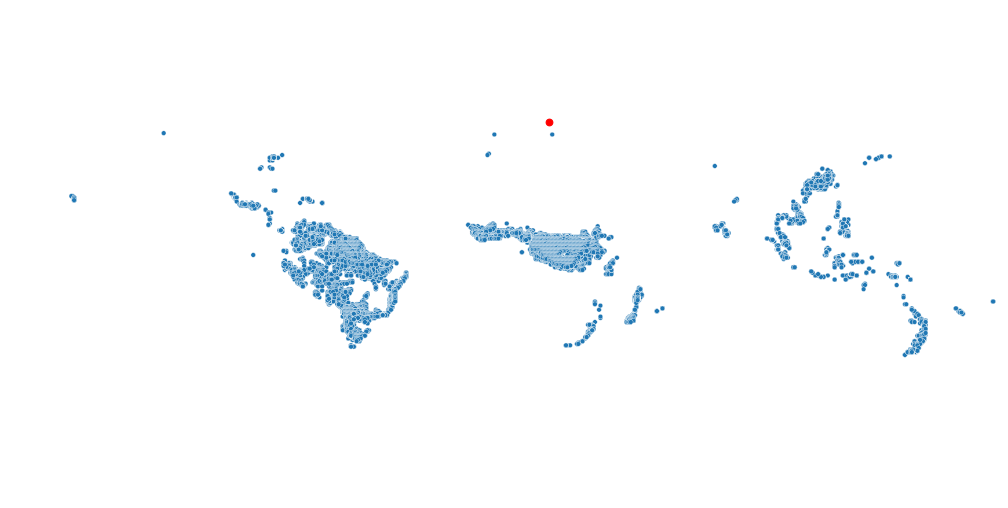

In [216]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)
g.scatter(x=c_lon, y=c_lat, color='r')
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

In [303]:
## returns list of plants that might live there in the future depending on scenario
df_plant_info[df_plant_info['Cluster'] == pr_cl[0]].reset_index()

index      gbifID                            datasetKey  kingdom  \
0          3  3978653056  f91111a4-3c37-4273-ad0c-2789758d04e2  Plantae   
1      40111  2005977659  ee36f4f3-117a-4cdc-b5e0-10dc209d4b30  Plantae   
2      40113  2005977653  ee36f4f3-117a-4cdc-b5e0-10dc209d4b30  Plantae   
3      40114  2005977647  ee36f4f3-117a-4cdc-b5e0-10dc209d4b30  Plantae   
4      40115  2005977632  ee36f4f3-117a-4cdc-b5e0-10dc209d4b30  Plantae   
...      ...         ...                                   ...      ...   
5986  498989  2425474821  5846793d-f540-473c-88ee-23b2b13af7ef  Plantae   
5987  498990  2425475059  5846793d-f540-473c-88ee-23b2b13af7ef  Plantae   
5988  498991  2425474838  5846793d-f540-473c-88ee-23b2b13af7ef  Plantae   
5989  498992  2425474731  5846793d-f540-473c-88ee-23b2b13af7ef  Plantae   
5990  498993  2425474550  5846793d-f540-473c-88ee-23b2b13af7ef  Plantae   

            phylum          class    order    family       genus  \
0     Tracheophyta  Magnoliopsida  Fabales  Fabaceae    Swartzia   
1     Tracheophyta  Magnoliopsida  Fabales  Fabaceae  Vouacapoua   
2     Tracheophyta  Magnoliopsida  Fabales  Fabaceae  Vouacapoua   
3     Tracheophyta  Magnoliopsida  Fabales  Fabaceae  Vouacapoua   
4     Tracheophyta  Magnoliopsida  Fabales  Fabaceae  Vouacapoua   
...            ...            ...      ...       ...         ...   
5986  Tracheophyta  Magnoliopsida  Fabales  Fabaceae    Swartzia   
5987  Tracheophyta  Magnoliopsida  Fabales  Fabaceae    Swartzia   
5988  Tracheophyta  Magnoliopsida  Fabales  Fabaceae    Swartzia   
5989  Tracheophyta  Magnoliopsida  Fabales  Fabaceae    Swartzia   
5990  Tracheophyta  Magnoliopsida  Fabales  Fabaceae    Swartzia   

                   species  ...   sg54   sg55   sg56   sg57   sg58  sg59  \
0          Swartzia oraria  ...  117.0  343.0  281.0  173.0   94.0  63.0   
1     Vouacapoua americana  ...   55.0  370.0  262.0  176.0  116.0  71.0   
2     Vouacapoua americana  ...   75.0  346.0  268.0  176.0  100.0  66.0   
3     Vouacapoua americana  ...   55.0  370.0  262.0  176.0  116.0  71.0   
4     Vouacapoua americana  ...   75.0  346.0  268.0  176.0  100.0  66.0   
...                    ...  ...    ...    ...    ...    ...    ...   ...   
5986     Swartzia dipetala  ...   22.0  289.0  194.0  150.0   96.0  50.0   
5987     Swartzia dipetala  ...   22.0  289.0  194.0  150.0   96.0  50.0   
5988     Swartzia dipetala  ...   22.0  289.0  194.0  150.0   96.0  50.0   
5989     Swartzia dipetala  ...   22.0  289.0  194.0  150.0   96.0  50.0   
5990     Swartzia dipetala  ...   22.0  289.0  194.0  150.0   96.0  50.0   

      sg60  Cluster c_lat  c_lon  
0     32.0       11   173    224  
1     41.0       11   174    246  
2     42.0       11   175    246  
3     41.0       11   174    246  
4     42.0       11   175    246  
...    ...      ...   ...    ...  
5986  28.0       11   174    238  
5987  28.0       11   174    238  
5988  28.0       11   174    238  
5989  28.0       11   174    238  
5990  28.0       11   174    238  

[5991 rows x 101 columns]

In [304]:
## future species
future = df_plant_info[(df_plant_info['Cluster']==pr_cl[0])]['species'].unique()
future

array(['Swartzia oraria', 'Vouacapoua americana',
       'Diplostephium dentatum', 'Tournefortia brantii',
       'Anisoptera costata', 'Dipterocarpus grandiflorus',
       'Espeletia cleefii', 'Guaiacum officinale', 'Virola surinamensis',
       'Handroanthus serratifolius', 'Strophanthus bequaertii',
       'Vernonia scaettae', 'Polystachya fallax',
       'Polystachya pachychila', 'Polystachya dewanckeliana',
       'Bulbophyllum vulcanicum', 'Begonia pulcherrima',
       'Blotiella bouxiniana', 'Eggelingia ligulifolia',
       'Espeletia tunjana', 'Espeletia brachyaxiantha',
       'Symplocos lehmannii', 'Oreopanax acerifolius', 'Myrcia killipii',
       'Miconia capitellata', 'Minquartia guianensis',
       'Attalea tessmannii', 'Irvingia gabonensis', 'Dalbergia horrida',
       'Milicia excelsa', 'Mitragyna stipulosa', 'Mitragyna ledermannii',
       'Nauclea diderrichii', 'Prunus buxifolia', 'Peddiea rapaneoides',
       'Monanthotaxis orophila', 'Impatiens bequaertii',
       '

In [197]:
## past species
past = df_plant_info[(df_plant_info['Cluster']==cl_no)]['species'].unique()
past

array(['Fraxinus pennsylvanica', 'Lathyrus odoratus',
       'Fraxinus americana', 'Medicago arborea',
       'Pseudomisopates rivas-martinezii', 'Jurinea fontqueri',
       'Gyrocaryum oppositifolium', 'Echinospartum ibericum',
       'Dioscorea chouardii', 'Astragalus devesae', 'Pitavia punctata',
       'Cousinia knorringiae', 'Echium pininana', 'Anarrhinum duriminium',
       'Metasequoia glyptostroboides', 'Picea omorika',
       'Araucaria araucana', 'Juglans cinerea', 'Syringa josikaea',
       'Silene diclinis', 'Jasione foliosa', 'Silene hifacensis',
       'Cedrus atlantica', 'Kalanchoe daigremontiana',
       'Marsilea batardae', 'Poa laxa', 'Sequoia sempervirens',
       'Genista tribracteolata', 'Picris cupuligera',
       'Narcissus nevadensis', 'Narcissus bugei', 'Glandora nitida',
       'Eryngium viviparum', 'Crepis granatensis',
       'Antirrhinum lopesianum', 'Fraxinus excelsior', 'Sonchus arvensis',
       'Pulsatilla vulgaris', 'Galanthus nivalis',
       'Baldell

In [198]:
## check intersection
bool(set(past) & set(future))

False

In [292]:
## fill dataframe with plant species per cluster
lili = []
for i in range(75):
    lili.append(df_plant_info[(df_plant_info['Cluster']==i)]['species'].unique())
df_feat['ssp126'] = lili

In [293]:
df_feat

species_past_today  \
0   [Magnolia jardinensis, Epidendrum uribei, Swar...   
1   [Fraxinus pennsylvanica, Fraxinus americana, S...   
2   [Fraxinus pennsylvanica, Lathyrus odoratus, Fr...   
3   [Sideritis serrata, Silene diclinis, Narcissus...   
4   [Dombeya ledermannii, Centrolobium ochroxylum,...   
..                                                ...   
70  [Fraxinus pennsylvanica, Lathyrus odoratus, Fr...   
71  [Lathyrus odoratus, Fraxinus pennsylvanica, Fr...   
72  [Fraxinus pennsylvanica, Fraxinus americana, L...   
73  [Swartzia oraria, Chrysophyllum superbum, Esch...   
74  [Lathyrus odoratus, Sequoiadendron giganteum, ...   

                                               ssp126  
0   [Magnolia jardinensis, Epidendrum uribei, Swar...  
1   [Fraxinus pennsylvanica, Fraxinus americana, S...  
2   [Fraxinus pennsylvanica, Lathyrus odoratus, Fr...  
3   [Sideritis serrata, Silene diclinis, Narcissus...  
4   [Dombeya ledermannii, Centrolobium ochroxylum,...  
..                                                ...  
70  [Fraxinus pennsylvanica, Lathyrus odoratus, Fr...  
71  [Lathyrus odoratus, Fraxinus pennsylvanica, Fr...  
72  [Fraxinus pennsylvanica, Fraxinus americana, L...  
73  [Swartzia oraria, Chrysophyllum superbum, Esch...  
74  [Lathyrus odoratus, Sequoiadendron giganteum, ...  

[75 rows x 2 columns]

# Bounding box - future climate - return where plants could move

In [228]:
dict_scen = {'ssp126' : 1,
              'ssp245' : 2,
              'ssp370' : 3,
              'ssp585' : 4,
             }

In [229]:
dict_time = {'2021-2040' : 1,
              '2041-2060' : 2,
              '2061-2080' : 3,
              '2081-2100' : 4,
             }

In [335]:
sel = dict_scen['ssp585']*dict_time['2081-2100']-1

In [336]:
pr_df = pd.DataFrame(cl_fut[sel])
pr_df = pr_df.astype(float)

In [337]:
fcl_sam = pr_df.iloc[:,2:]

In [338]:
fcl_sam.columns = df_all.iloc[:,3:-1].columns.values.tolist()
## in case not all features are used
fcl_sam = get_mean_soilgrid_columns(fcl_sam)

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_78936/371434831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'average_{i*6}_{i*6+5}'] = df.iloc[: , (20+(i*6)):(20+(i*6)+6)].mean(axis=1)


In [339]:
sel_pred_cl_fcl = scaler.transform(fcl_sam.values)
pred_fut_cl = kmeans.predict(sel_pred_cl_fcl)

In [340]:
pr_df['future_cluster'] = pred_fut_cl
pr_df.head()

0      1    2    3     4      5    6     7     8    9  ...   72   73  \
0  12.0  284.0 -4.6  3.6  13.6  800.8  6.8 -19.8  26.6  5.5  ...  0.0  0.0   
1  12.0  287.0 -4.4  3.6  13.7  787.0  7.1 -19.4  26.4  5.6  ...  0.0  0.0   
2  12.0  288.0 -4.5  3.6  13.8  780.3  6.9 -19.3  26.2  5.4  ...  0.0  0.0   
3  12.0  289.0 -4.6  3.6  14.0  759.8  6.6 -19.2  25.8  4.9  ...  0.0  0.0   
4  12.0  290.0 -5.5  6.6  22.2  831.2  7.8 -22.2  30.0  5.7  ...  0.0  0.0   

    74   75   76   77   78   79   80  future_cluster  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              65  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0              65  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0              65  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0              65  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0              65  

[5 rows x 82 columns]

In [341]:
## save future clim-inkl clusters
pr_df.to_csv("/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/Frontend_DF/ssp585_2081-2100.csv")

In [353]:
## read and store in one file
fold_nn = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/Frontend_DF/16_scen_maps_75cl_histandfuture/'
fi_n = sorted(os.listdir(fold_nn))

li_tt = []
for fil in fi_n:
    df_temp = pd.read_csv(fold_nn+fil)
    df_temp = df_temp.iloc[:, [0,1,-1]]
    df_temp = df_temp.astype(int)
    li_tt.append(df_temp)
li_tt = np.array(li_tt)
li_tt.shape

(16, 60137, 3)

In [355]:
with open("/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/Frontend_DF/future_scenarios_lonlat_clusters.npy", 'wb') as f:
    np.save(f, li_tt)

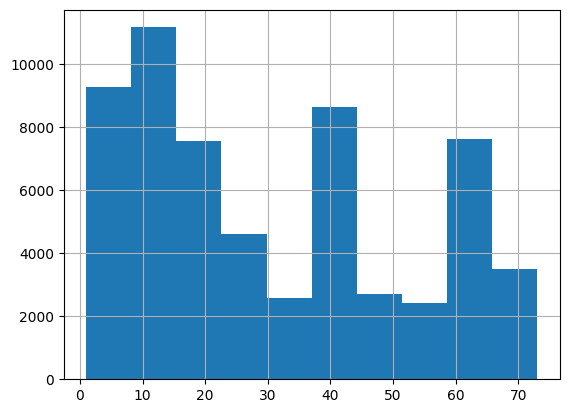

In [139]:
pr_df['future_cluster'].hist();

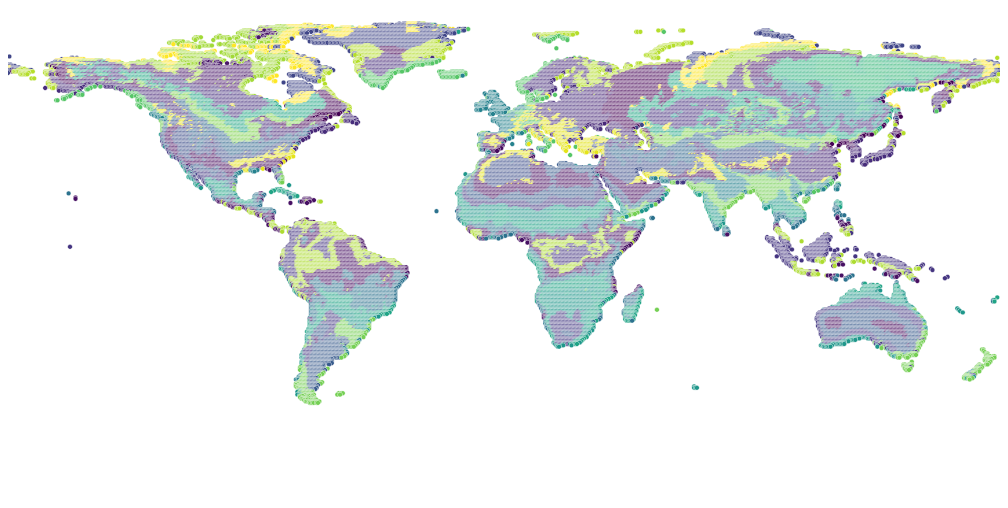

In [143]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=pr_df,  x=1, y=0, hue = 'future_cluster', legend=False, palette="viridis", size=0.01)
#g.scatter(x=c_lon, y=c_lat, color='r')
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

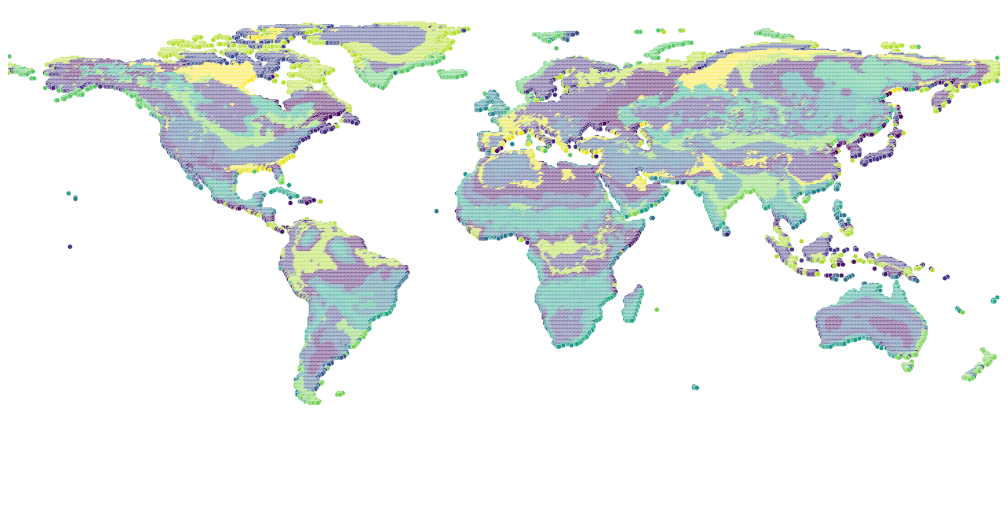

In [150]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=pr_df,  x=1, y=0, hue = 'future_cluster', legend=False, palette="viridis", size=0.01)
#g.scatter(x=c_lon, y=c_lat, color='r')
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

In [226]:
ar = sorted(pr_df['future_cluster'].unique())
ar

[5,
 6,
 7,
 8,
 10,
 11,
 12,
 15,
 16,
 19,
 22,
 28,
 32,
 36,
 43,
 45,
 46,
 51,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 64,
 65,
 69,
 73]

In [227]:
pr_df[pr_df['future_cluster'] == cl_no]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, future_cluster]
Index: []

[0 rows x 82 columns]

In [228]:
# if not available find the closest one
idx = np.abs(ar - cl_no).argmin()
ar[idx]

69

In [229]:
fut_pred_s = pr_df[pr_df['future_cluster'] == ar[idx]]
fut_pred_s

0      1     2    3     4      5     6     7     8     9  ...   72  \
0       12.0  284.0  -4.6  3.6  13.6  800.8   6.8 -19.8  26.6   5.5  ...  0.0   
1       12.0  287.0  -4.4  3.6  13.7  787.0   7.1 -19.4  26.4   5.6  ...  0.0   
2       12.0  288.0  -4.5  3.6  13.8  780.3   6.9 -19.3  26.2   5.4  ...  0.0   
3       12.0  289.0  -4.6  3.6  14.0  759.8   6.6 -19.2  25.8   4.9  ...  0.0   
4       12.0  290.0  -5.5  6.6  22.2  831.2   7.8 -22.2  30.0   5.7  ...  0.0   
...      ...    ...   ...  ...   ...    ...   ...   ...   ...   ...  ...  ...   
35615  117.0  600.0  22.4  7.7  23.2  941.8  38.9   5.6  33.3  31.4  ...  0.0   
35616  117.0  601.0  22.5  7.3  22.3  934.0  38.6   5.9  32.7  35.0  ...  0.0   
35618  117.0  603.0  22.4  7.1  22.8  896.6  38.0   6.7  31.3  34.4  ...  0.0   
35919  118.0  585.0  23.5  8.5  24.4  965.7  40.5   5.7  34.8  28.0  ...  0.0   
36233  119.0  588.0  24.2  8.6  24.6  964.0  41.6   6.5  35.1  28.5  ...  0.0   

        73   74   75   76   77   78   79   80  future_cluster  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
...    ...  ...  ...  ...  ...  ...  ...  ...             ...  
35615  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
35616  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
35618  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
35919  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  
36233  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              69  

[4064 rows x 82 columns]

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_1316/3921718096.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.scatterplot(data=fut_pred_s,  x=1, y=0,legend=False, palette="mako", size=0.01)


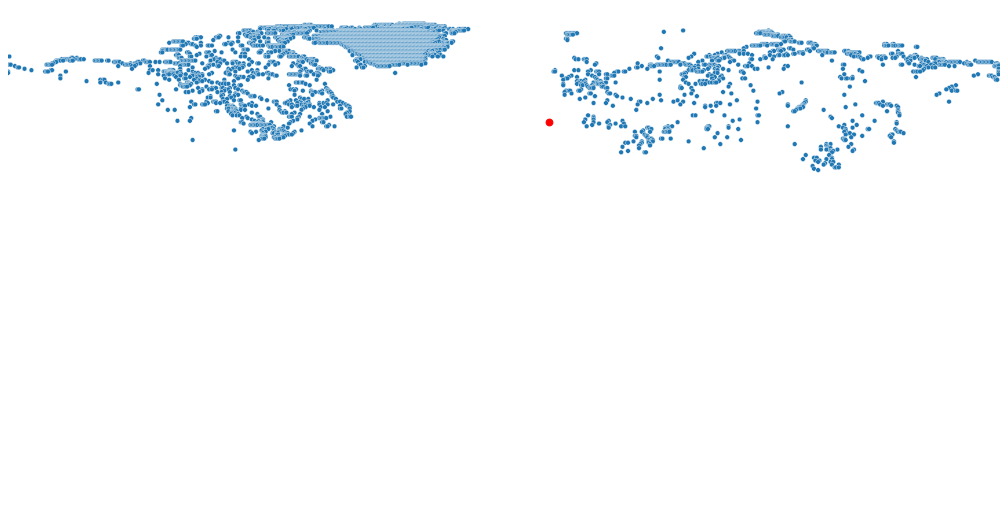

In [230]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=fut_pred_s,  x=1, y=0,legend=False, palette="mako", size=0.01)
g.scatter(x=c_lon, y=c_lat, color='r')
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

# Show Images selected - load images by id -  not implemented yet

In [365]:
## load images
fold_n_thumb = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/thumbnails/'
fi_n = os.listdir(fold_n_thumb)
#fi_n.remove('.DS_Store')

image_list = []
for i in range(10):
    im = Image.open(f"/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/thumbnails/{fi_n[i]}")
    image_list.append(im)

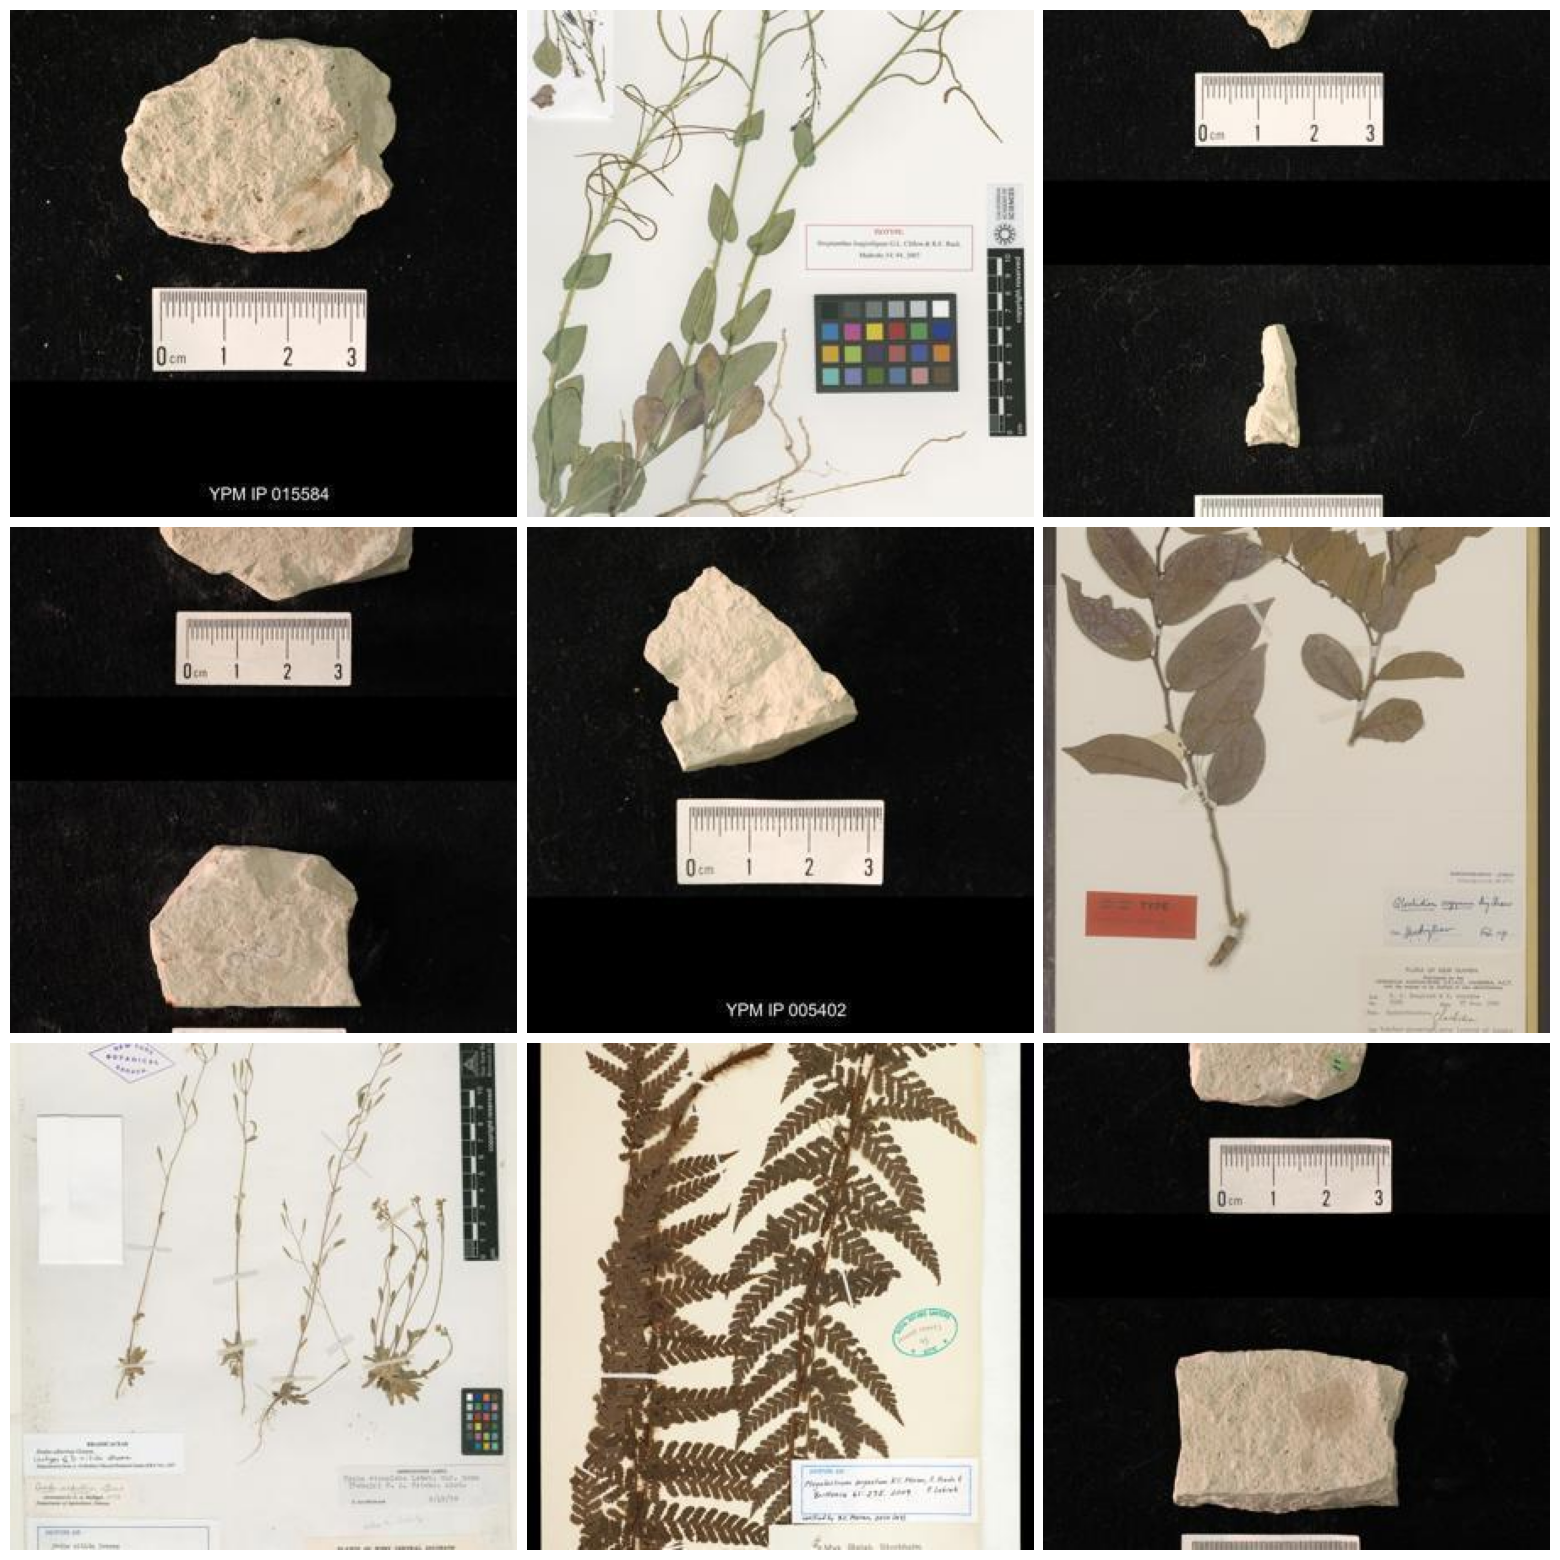

In [374]:
fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, image_list):
    ax.axis("off")
    ax.imshow(im)

plt.show()